# Scenario Builder
*Use this notebook to generate new scenarios for the simulation.*

In [1]:
%%capture
%matplotlib inline


import GWorld
import Agent
import PlotGWorld
plotgw = PlotGWorld.PlotGWorld(); # Object for accessing plotters
import pprint
import json
import numpy as np
rng = np.random.default_rng(seed=0)

---
The Scenario Buiilder creates new scenarios using already existing scenarios as a template.

## Inputs
- `Scenario_source_file` : Name of the JSON file which has the **template scenario**
- `Scenario_destination_file` : Name of the JSON file to which the **new scenario** is to be saved. 
- `Template_Scenario` : Name of the **template scenario** in `Scenario_source_file` which is to be used as the template for the **new scenario**
- `new_scenario_name` : Name of the **new scenario**

In [2]:
# For creating a New Scenarion based on Some Scenario
Template_Scenario = 'Intersection12by12-8Agents-5Cases-3Iterations-policy-nuanced'
new_scenario_name = 'Intersection12by12-8Agents-5Cases-3Iterations-policy-random'

Scenario_source_file = 'Scenarios4FeARSims.json'
Scenario_destination_file = 'Scenarios4FeARSims.json'

Scenario = GWorld.LoadJsonScenario(json_filename=Scenario_source_file,scenario_name=Template_Scenario)

# Whether to overwrite existing scenarios
Overwrite = False
# Overwrite = True

## Preview Existing Scenarios


------------------------------------------------------------------------------------------------------------
4by4-8Agents-5Cases-3Iterations-Random
------------------------------------------------------------------------------------------------------------


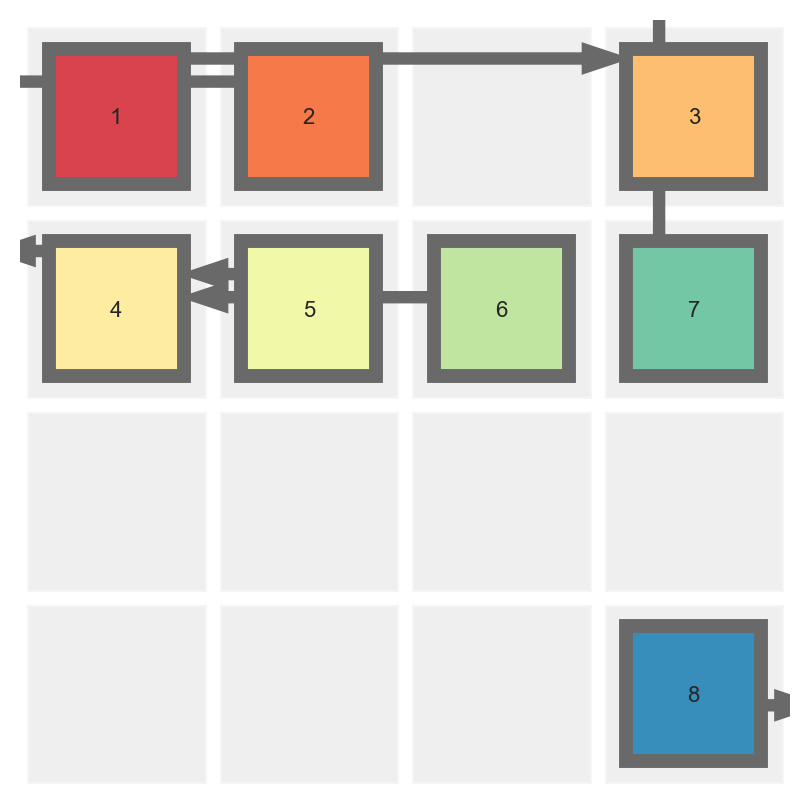

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
5by5-15Agents-5Cases-3Iterations-Random
------------------------------------------------------------------------------------------------------------


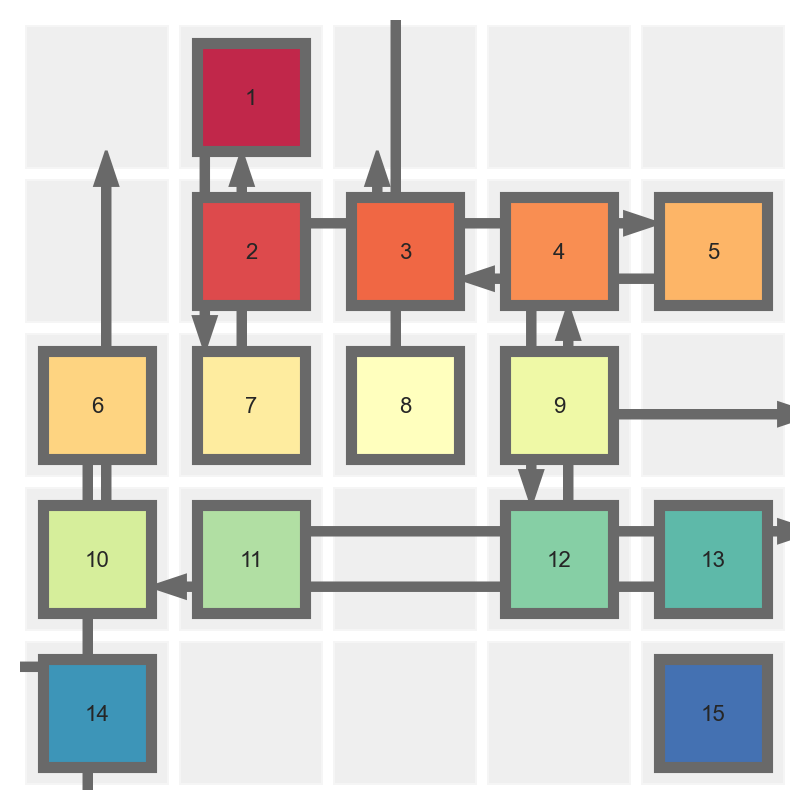

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
5by5-8Agents-5Cases-3Iterations-Random
------------------------------------------------------------------------------------------------------------


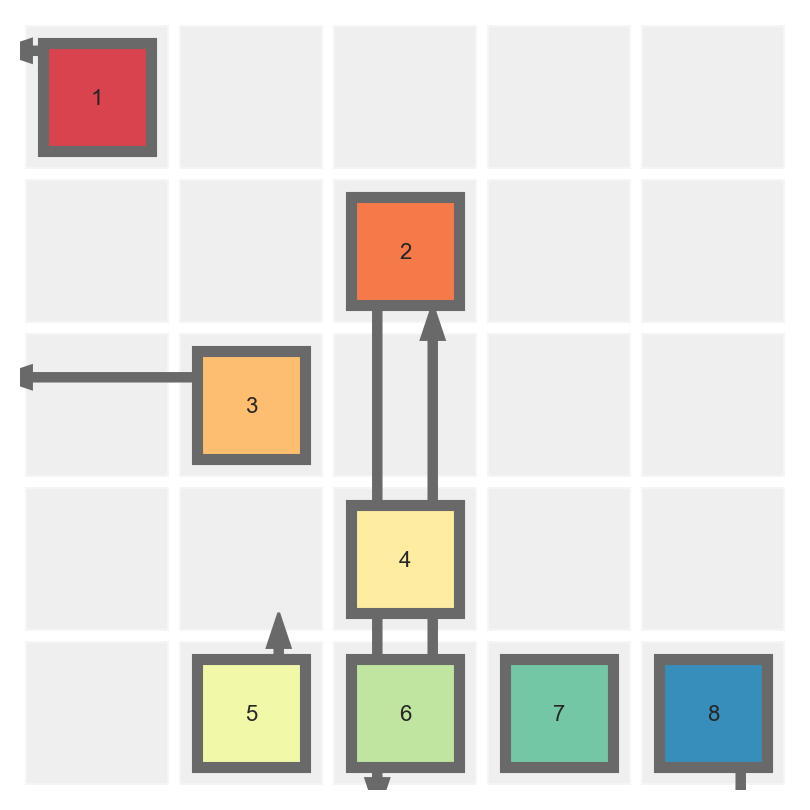

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
7by7-8Agents-5Cases-3Iterations-Random
------------------------------------------------------------------------------------------------------------


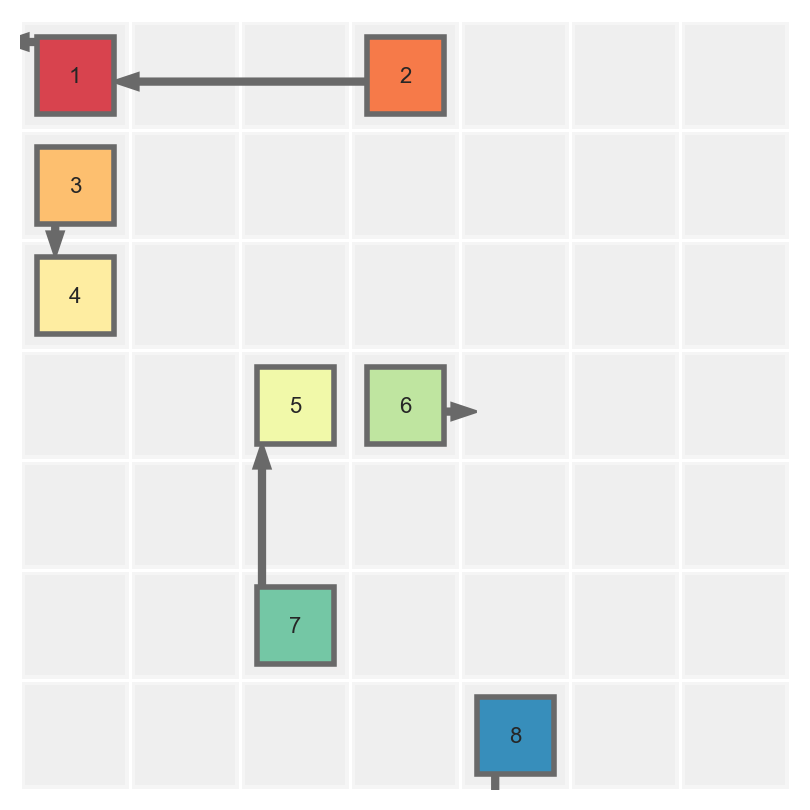

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
CrossyRoad
------------------------------------------------------------------------------------------------------------


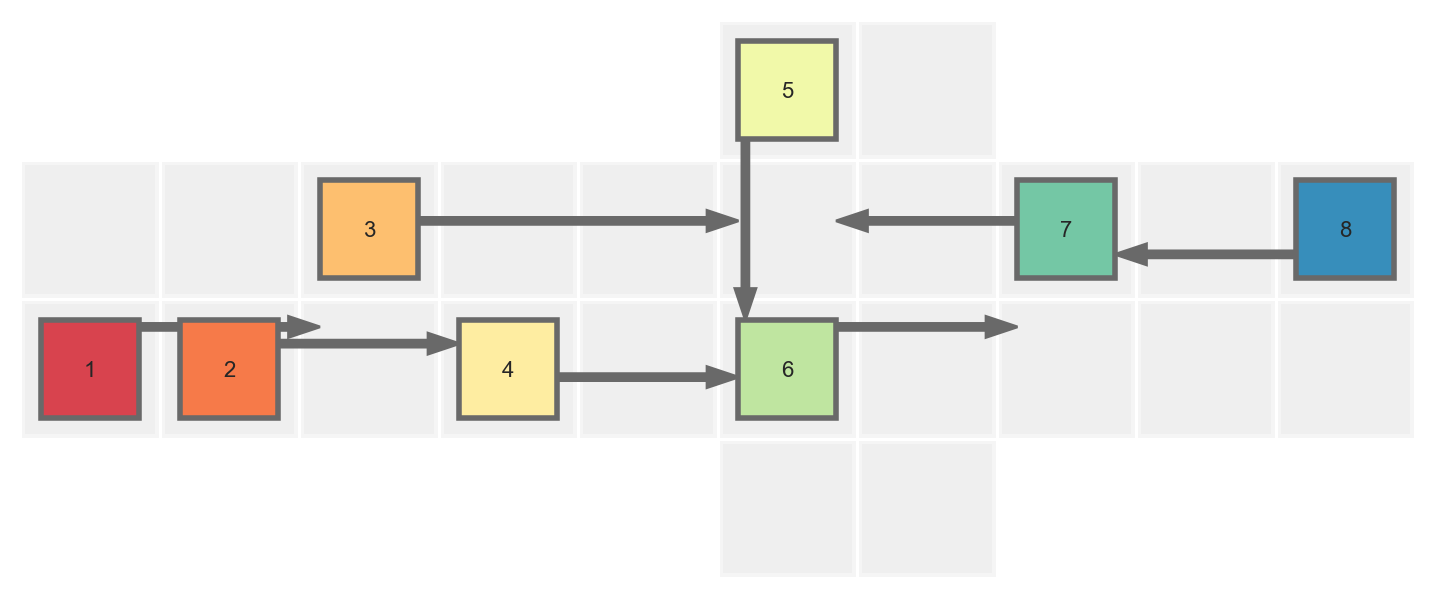

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
CrossyRoad0
------------------------------------------------------------------------------------------------------------


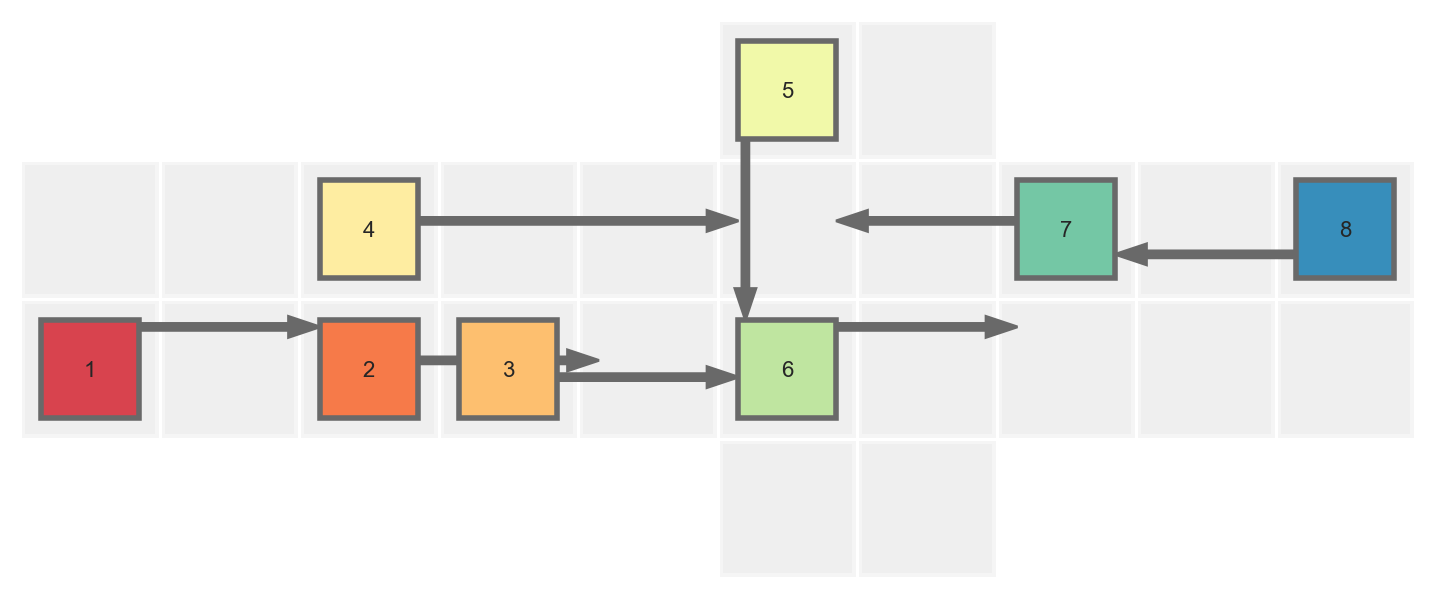

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
CrossyRoad1
------------------------------------------------------------------------------------------------------------


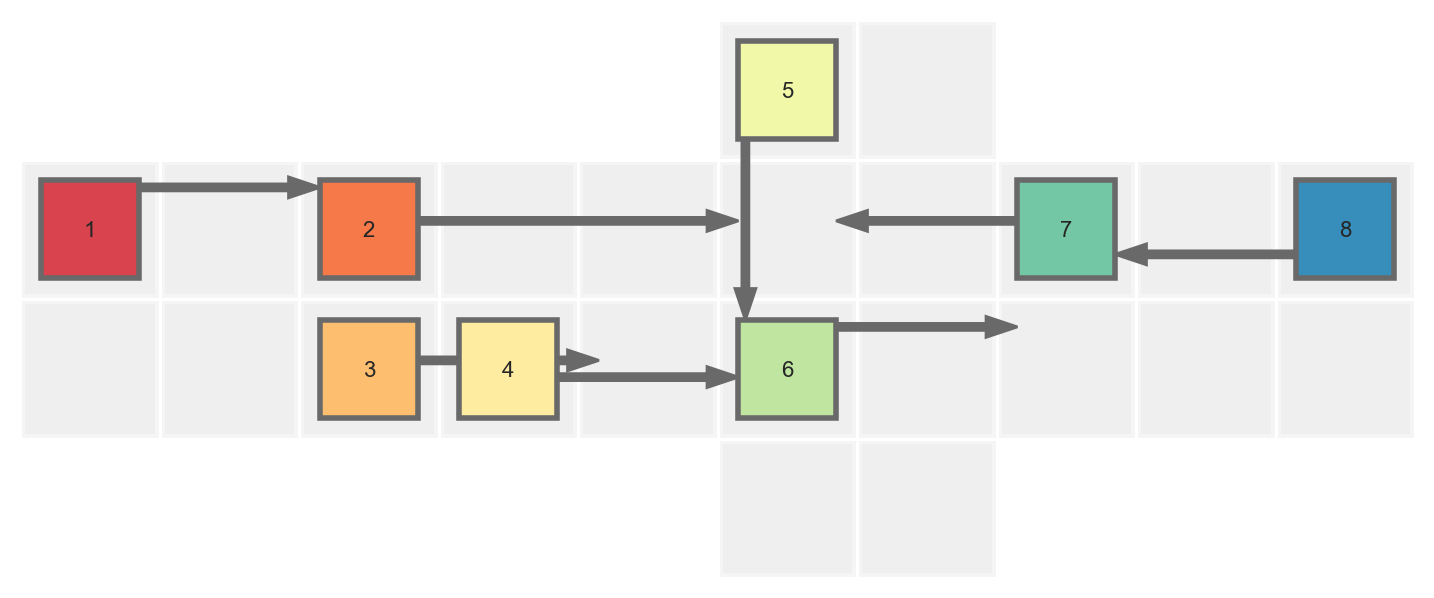

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
CrossyRoad_elementary
------------------------------------------------------------------------------------------------------------


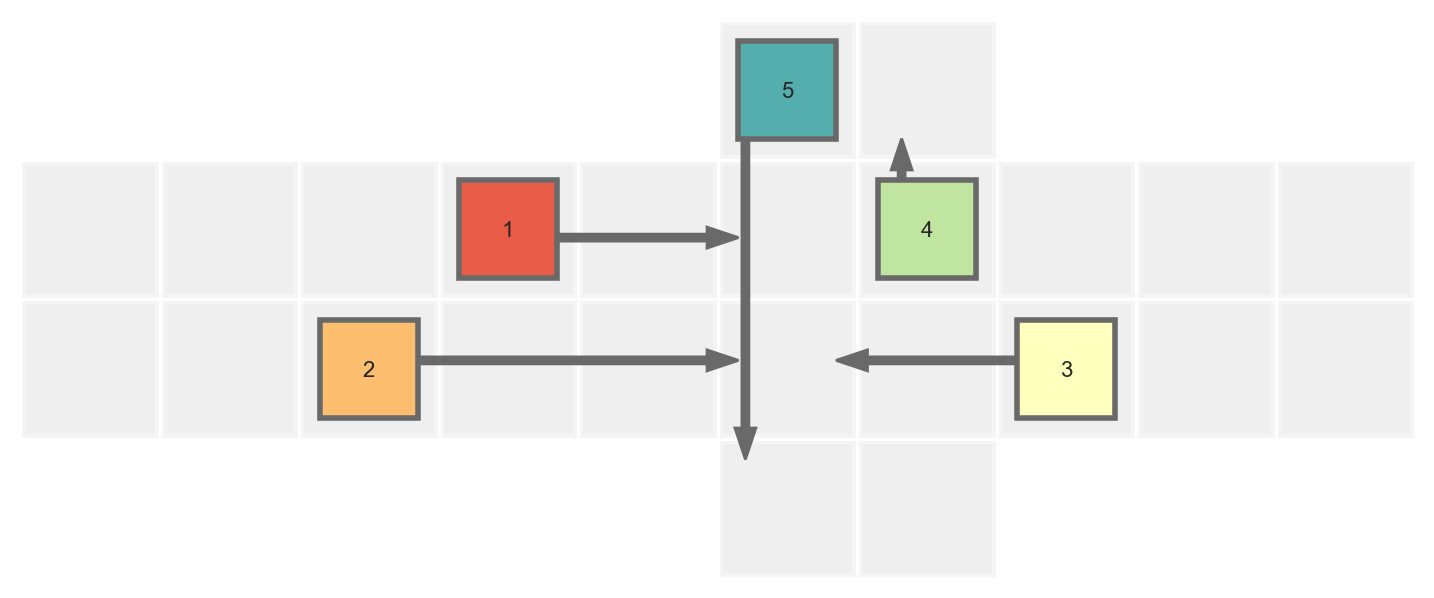

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
CrossyRoad_elementary_0
------------------------------------------------------------------------------------------------------------


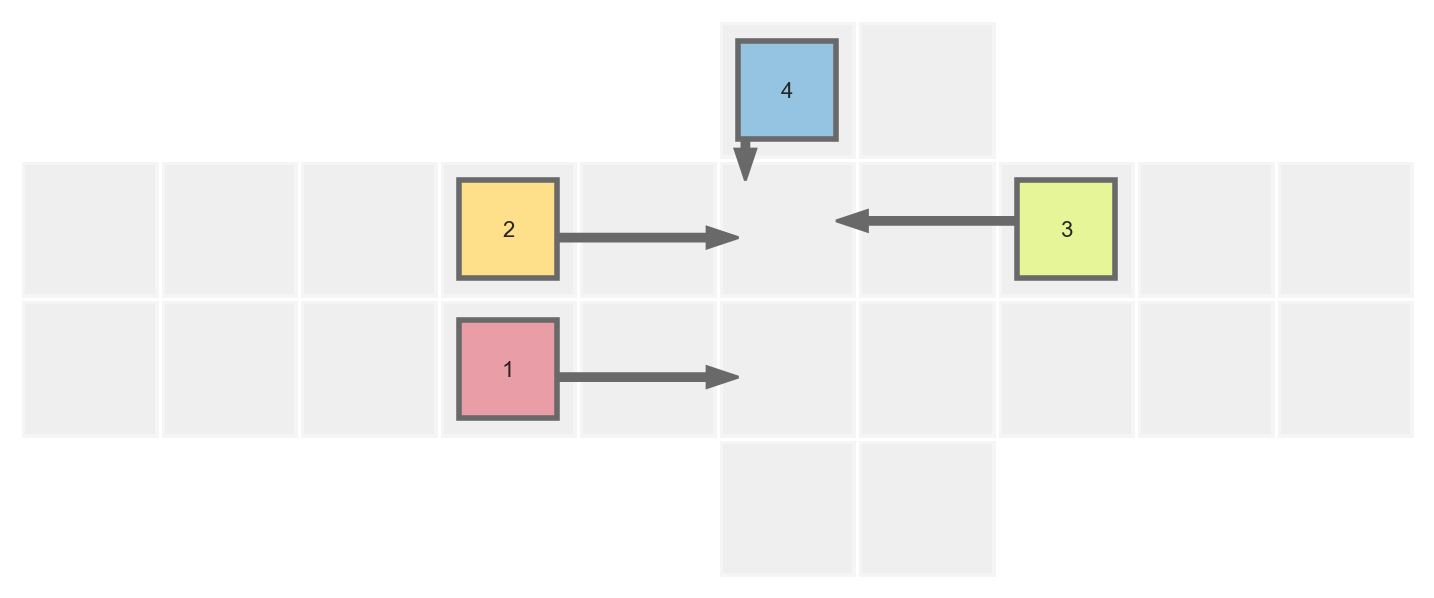

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
DoubleLane-2Agents-5Cases
------------------------------------------------------------------------------------------------------------


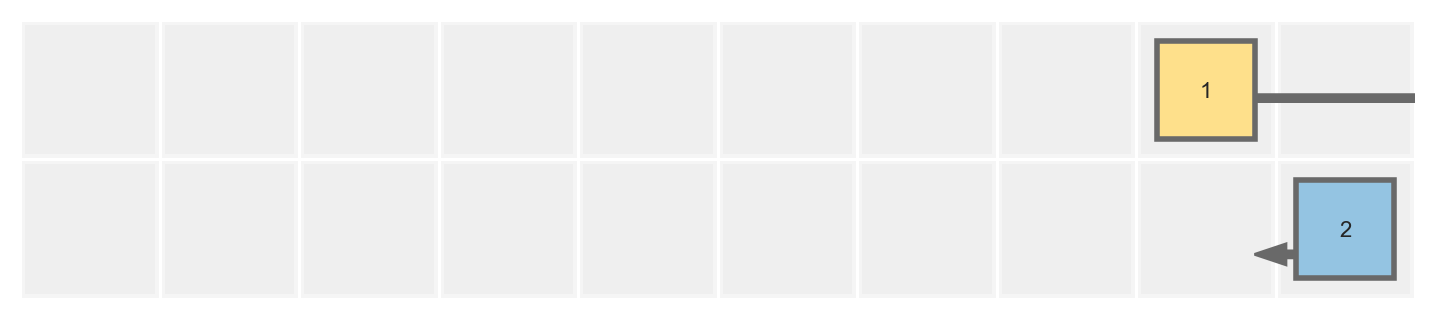

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
DoubleLane-2Agents-5Cases-5Iterations
------------------------------------------------------------------------------------------------------------


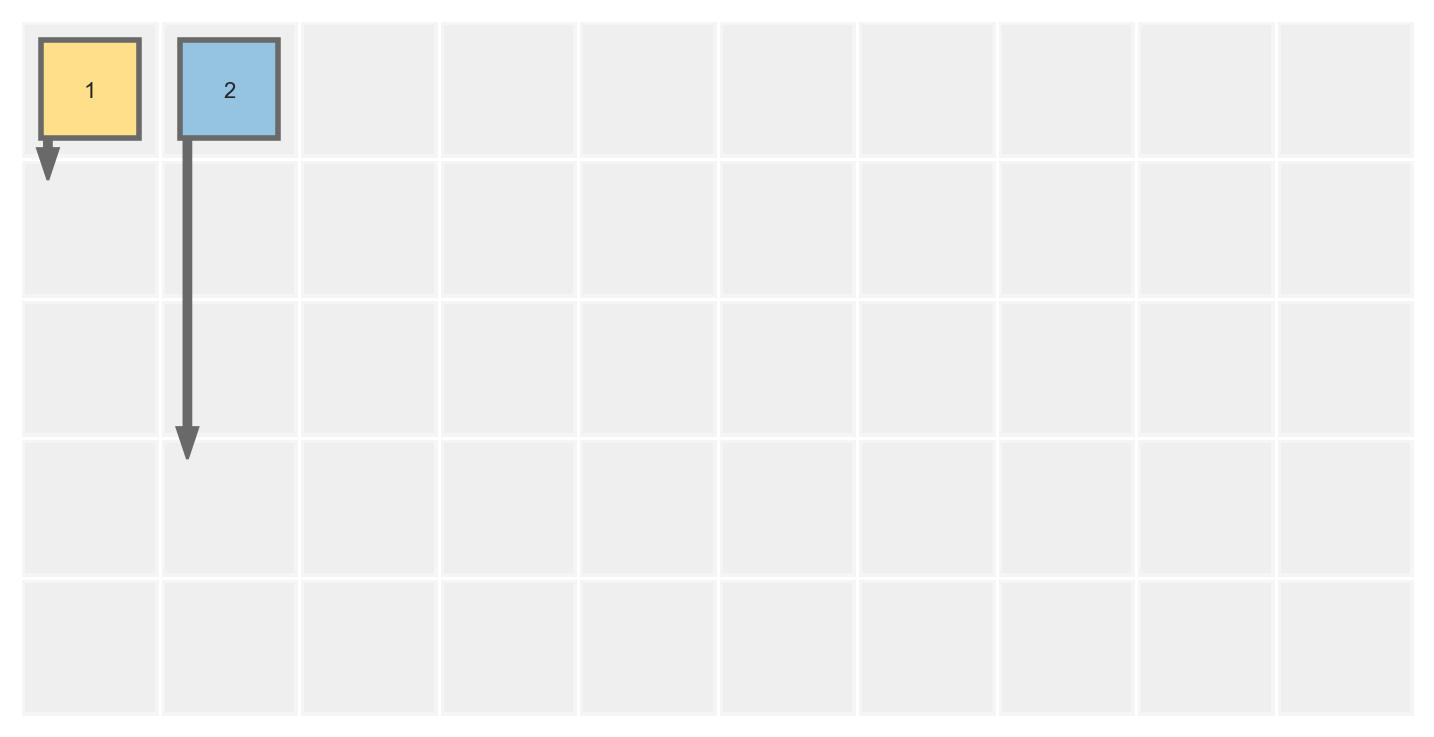

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Elementary
------------------------------------------------------------------------------------------------------------


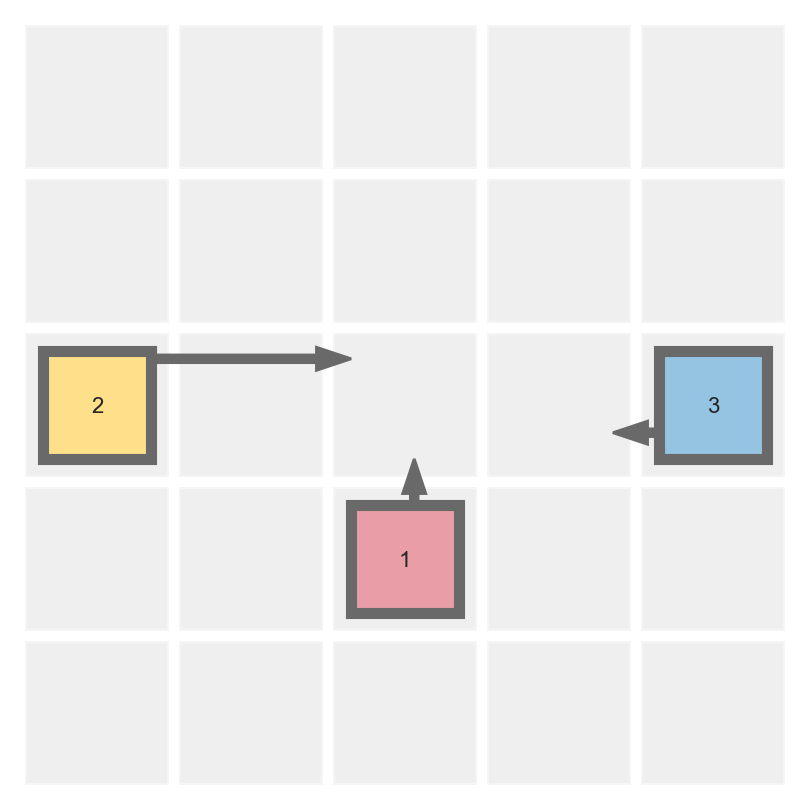

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
FeasibleActionsIllustration
------------------------------------------------------------------------------------------------------------


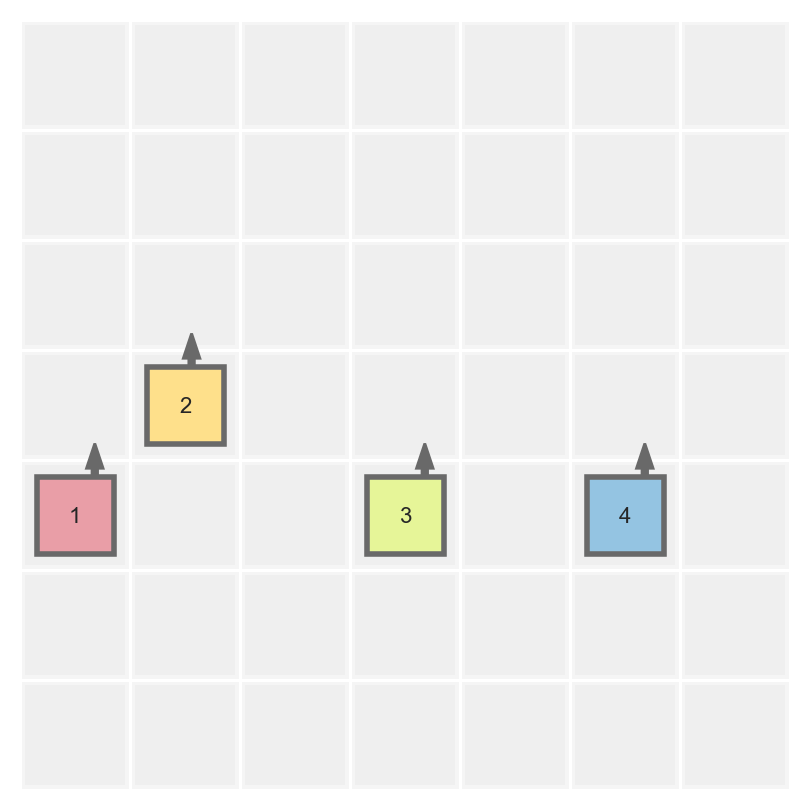

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
GameMap
------------------------------------------------------------------------------------------------------------
policyMap =
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


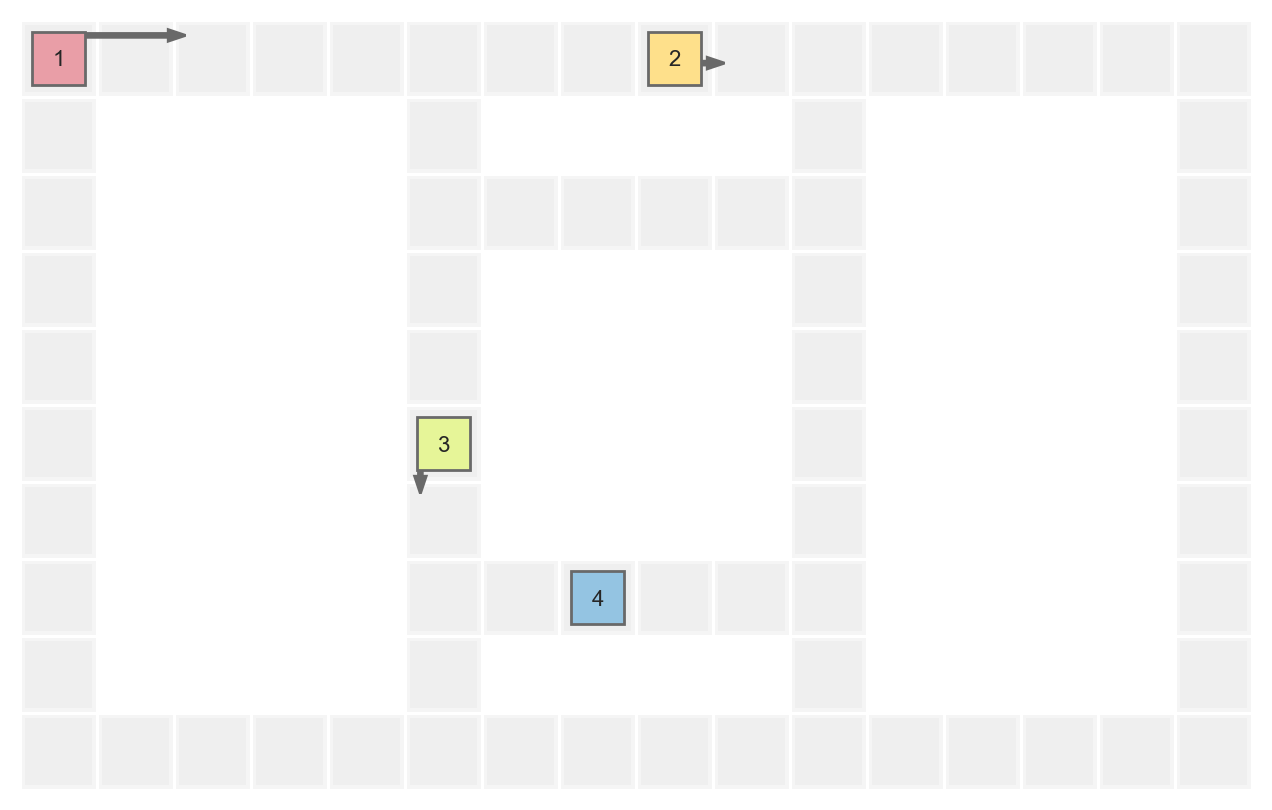

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
GameMap_8
------------------------------------------------------------------------------------------------------------
policyMap =
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


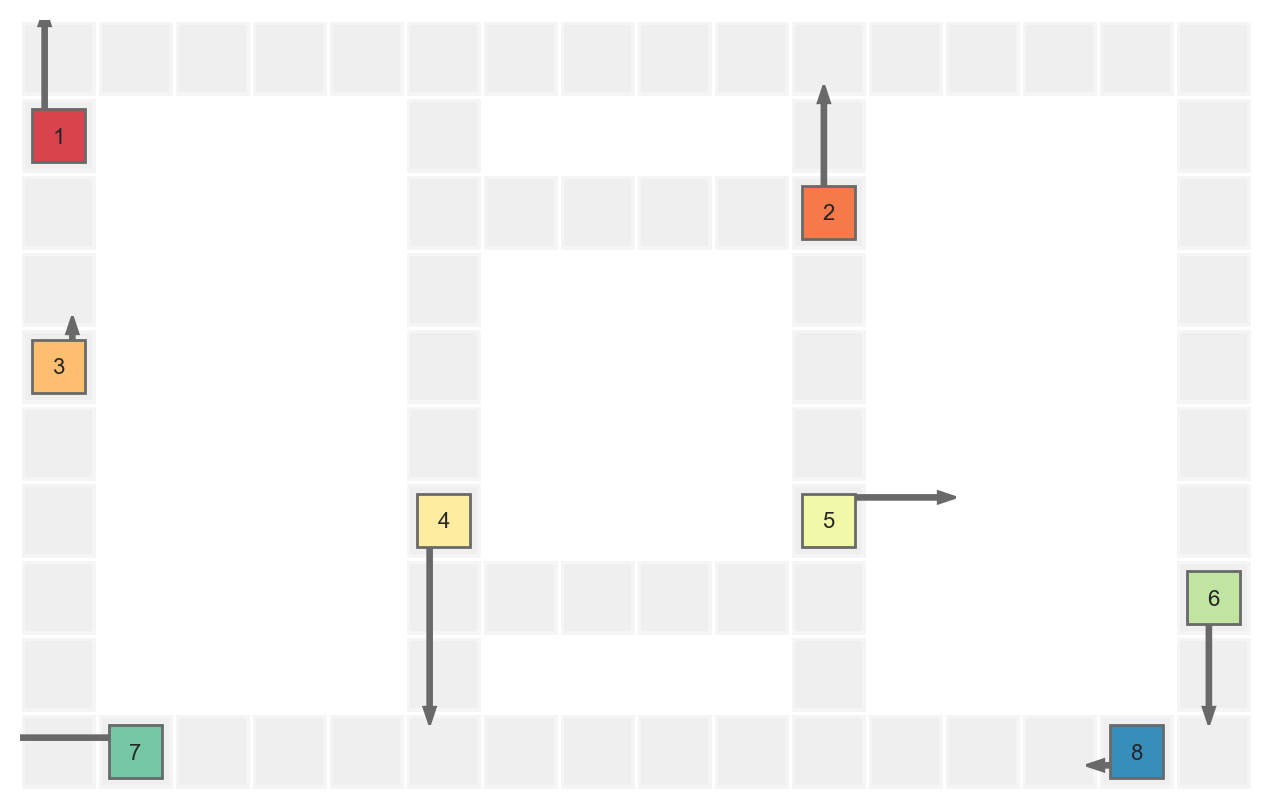

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
GameMap_Walls
------------------------------------------------------------------------------------------------------------


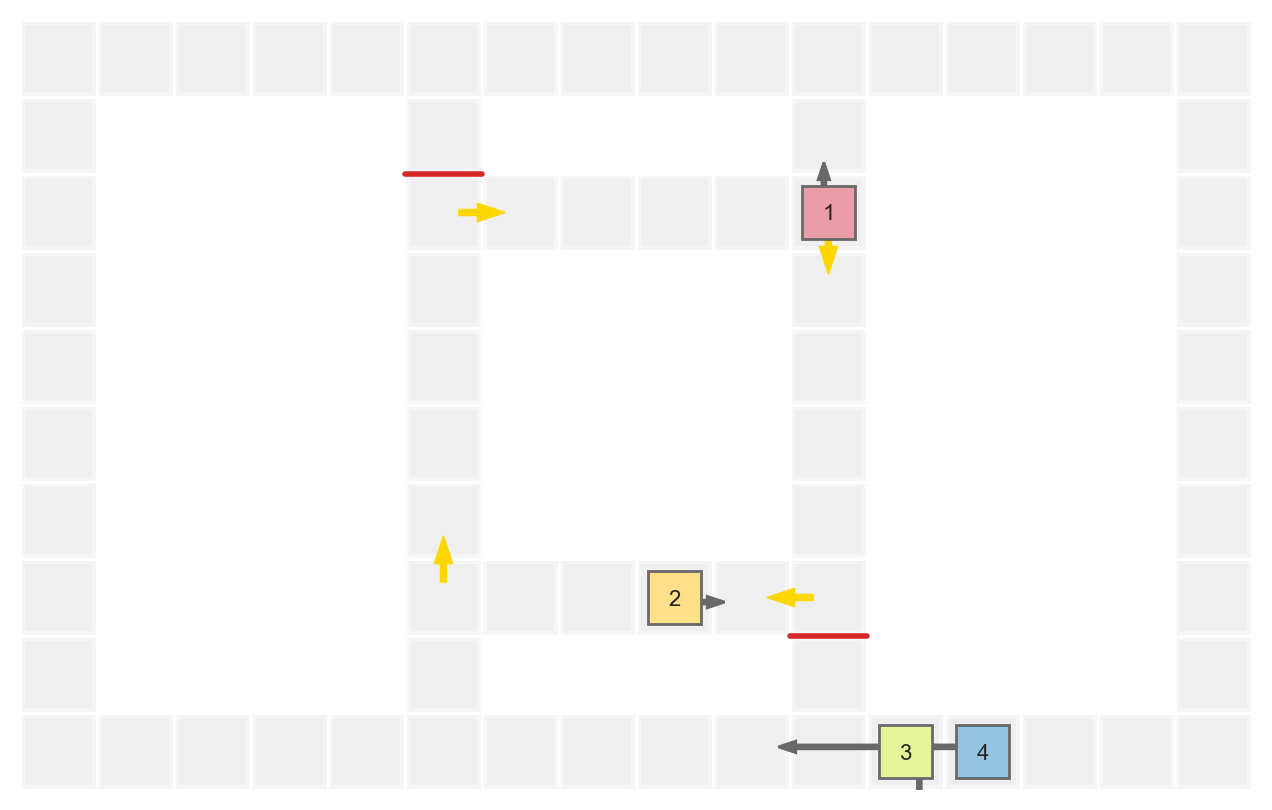

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents
------------------------------------------------------------------------------------------------------------


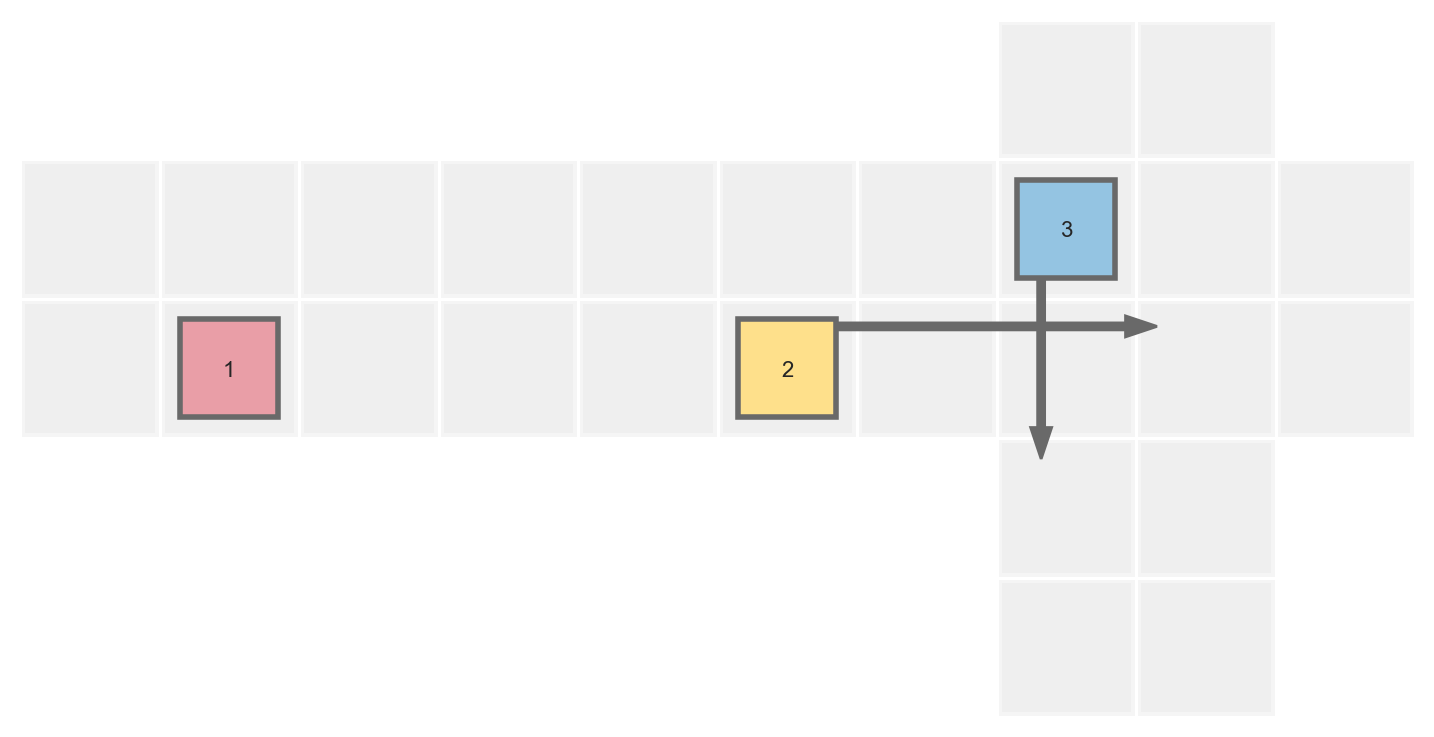

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents-100Cases-1Iteration
------------------------------------------------------------------------------------------------------------


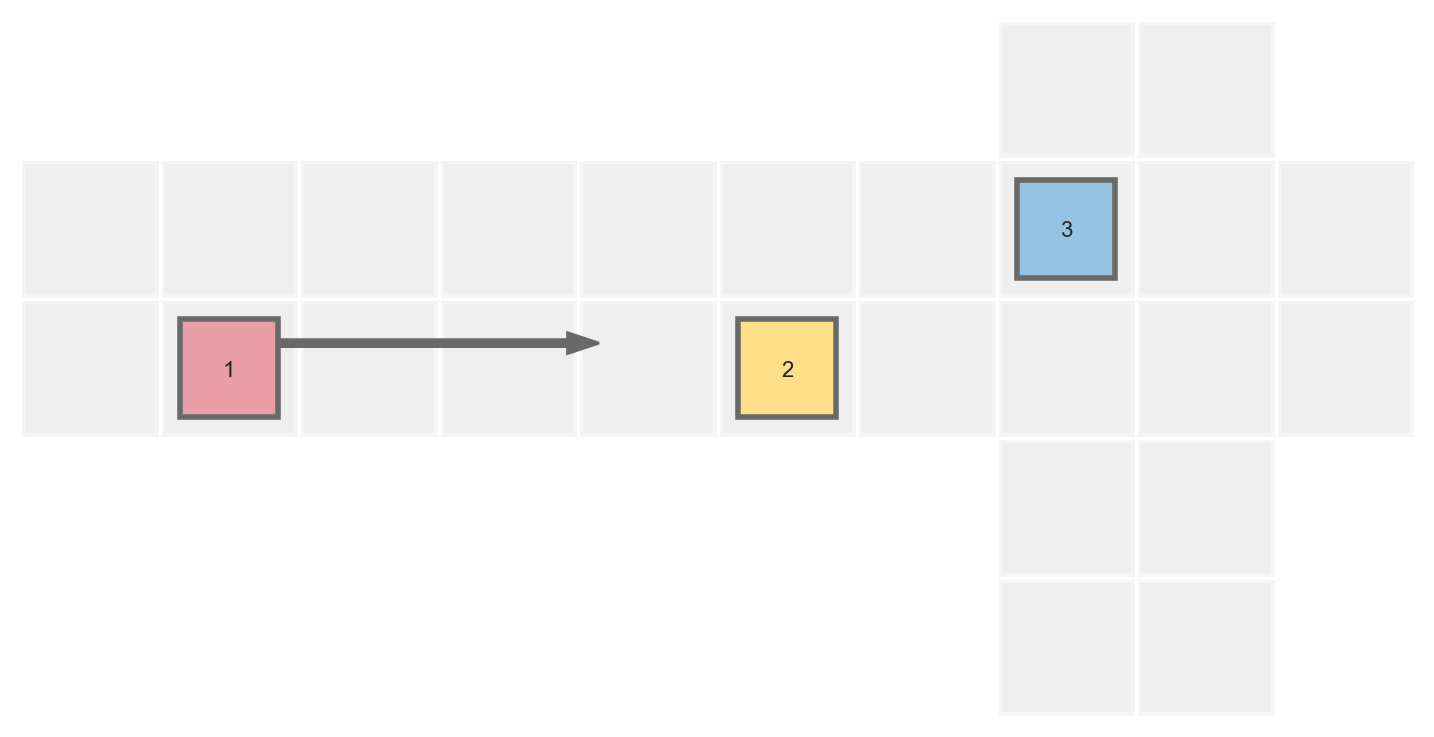

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents-100Cases-3Iterations
------------------------------------------------------------------------------------------------------------


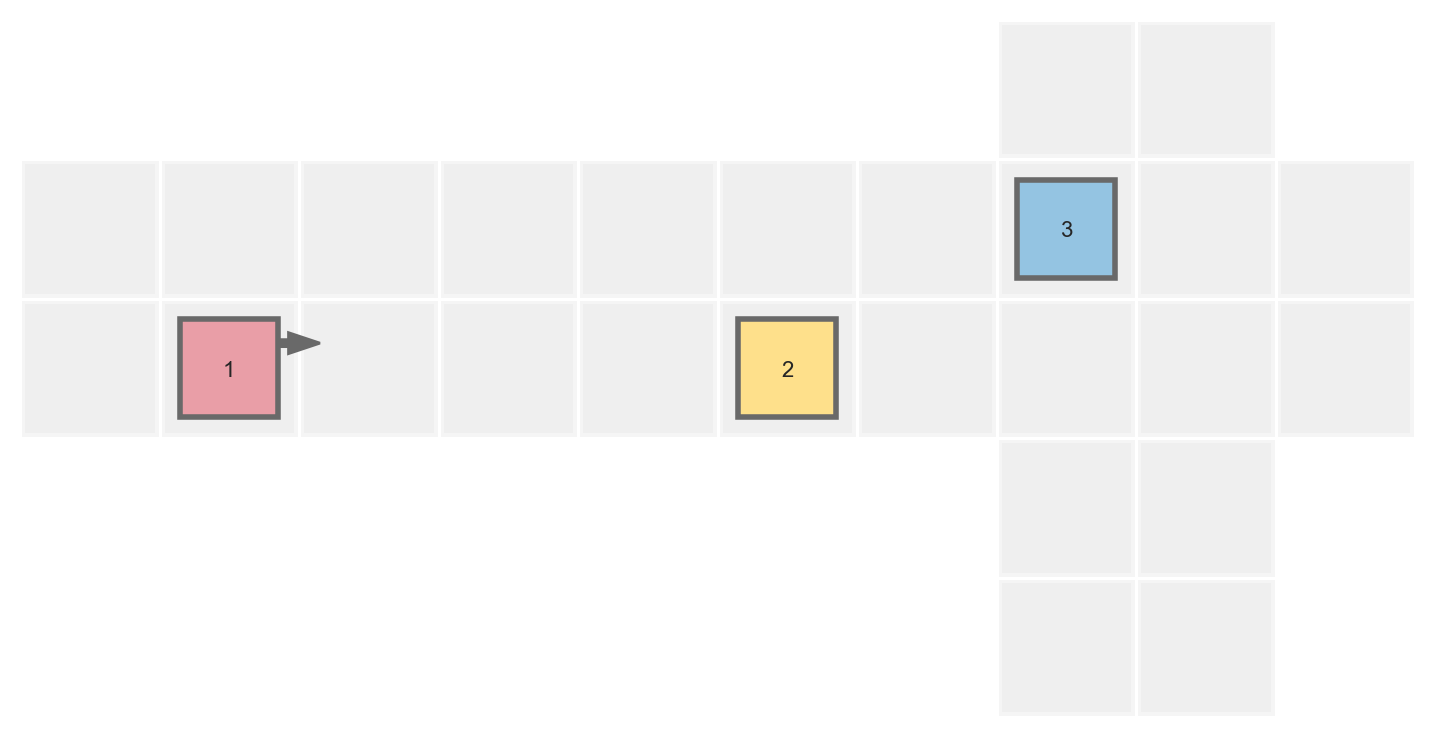

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents-Tight
------------------------------------------------------------------------------------------------------------


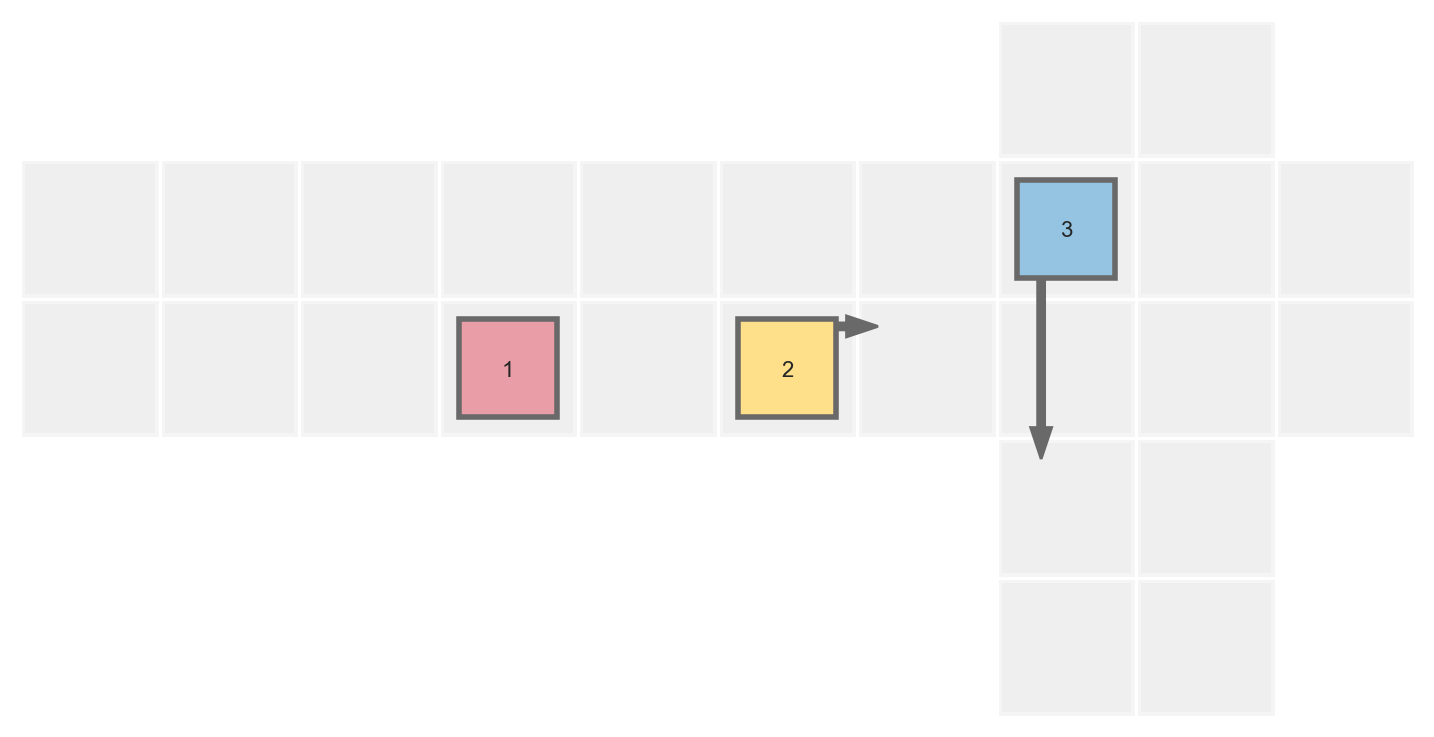

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-6Agents-10Cases-3Iterations-SpecifiedVectors
------------------------------------------------------------------------------------------------------------


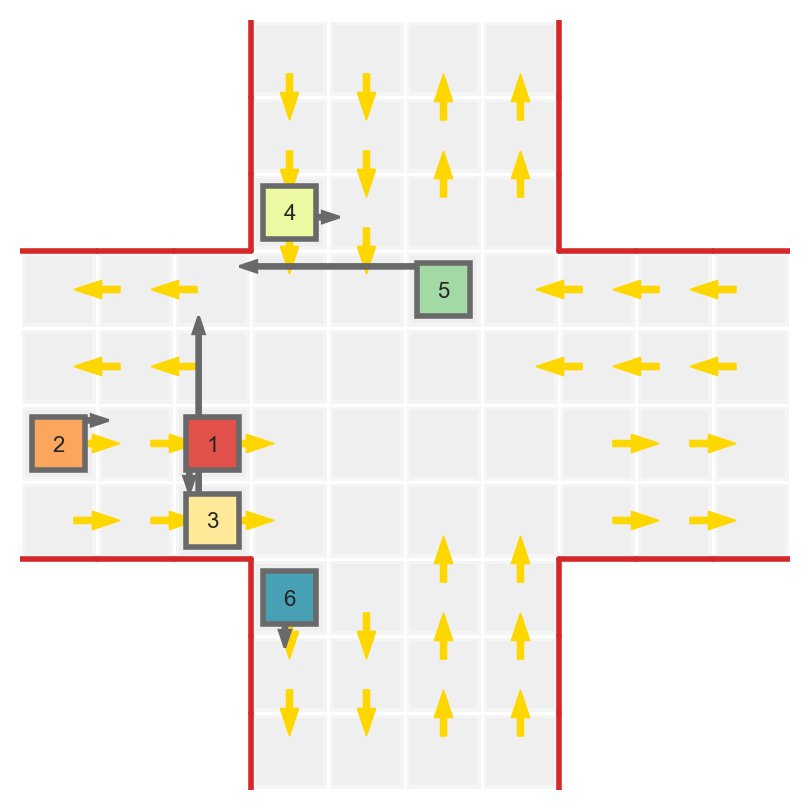

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-6Agents-50Cases-3Iterations
------------------------------------------------------------------------------------------------------------


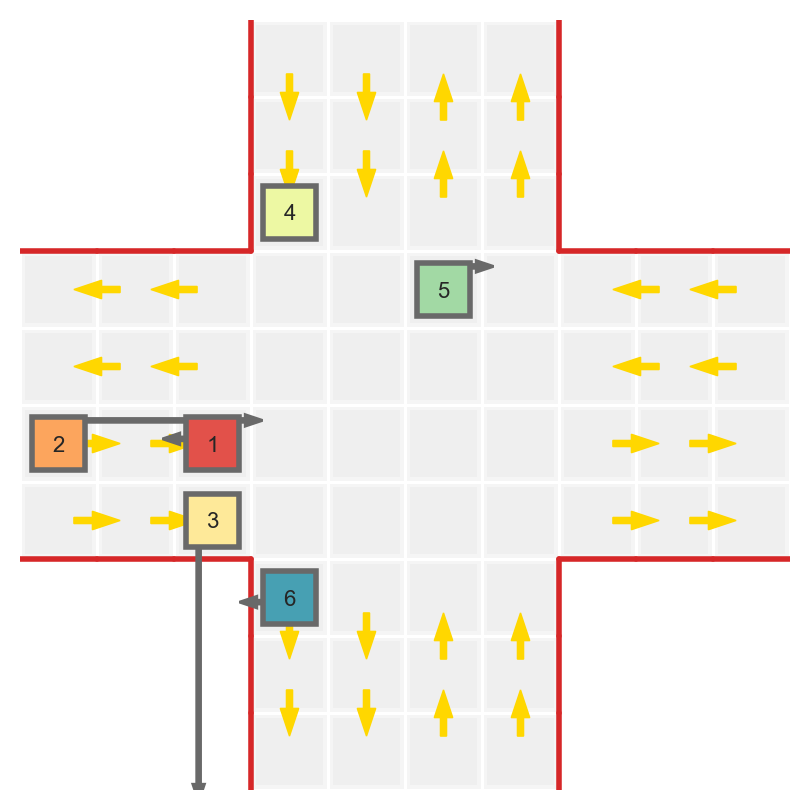

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-6Agents-50Cases-3Iterations-SpecifiedVectors
------------------------------------------------------------------------------------------------------------


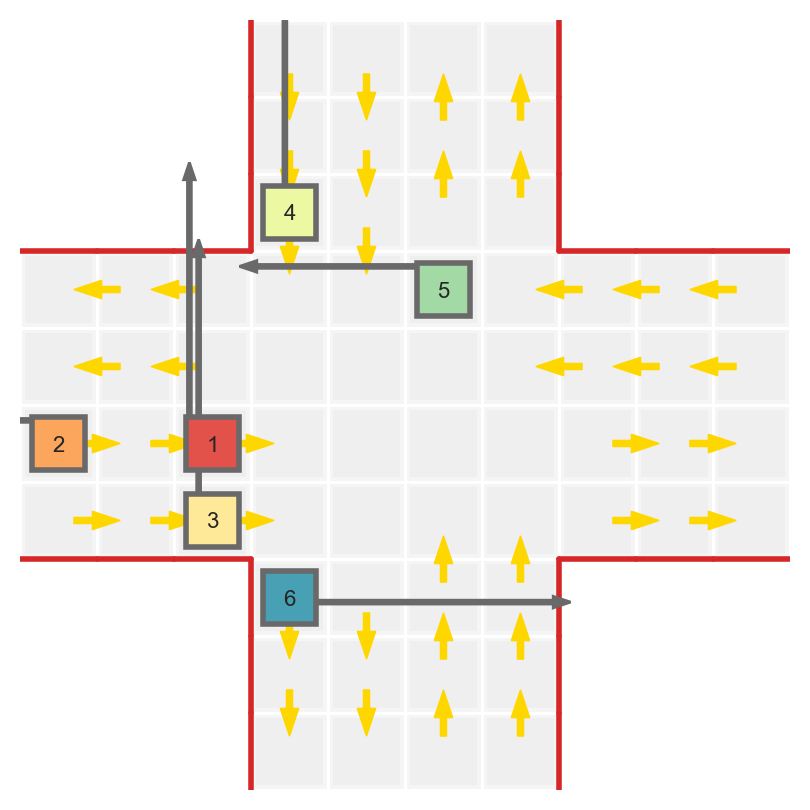

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection10by10-8Agents-5Cases-3Iterations-Random
------------------------------------------------------------------------------------------------------------


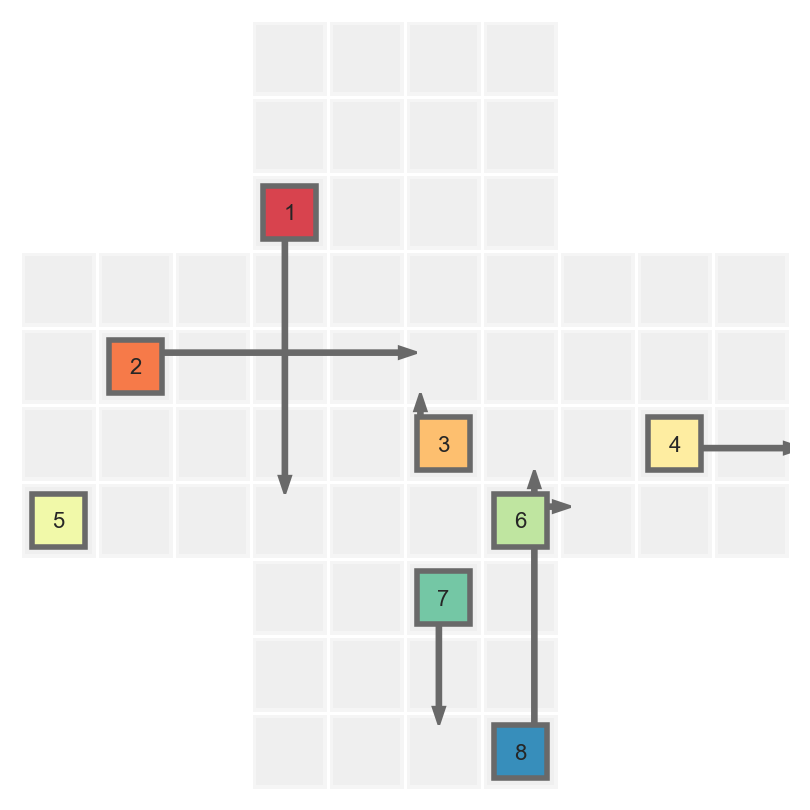

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-50Cases-5Iterations-policy-aggressive
------------------------------------------------------------------------------------------------------------
policyMap =
 [[0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]]


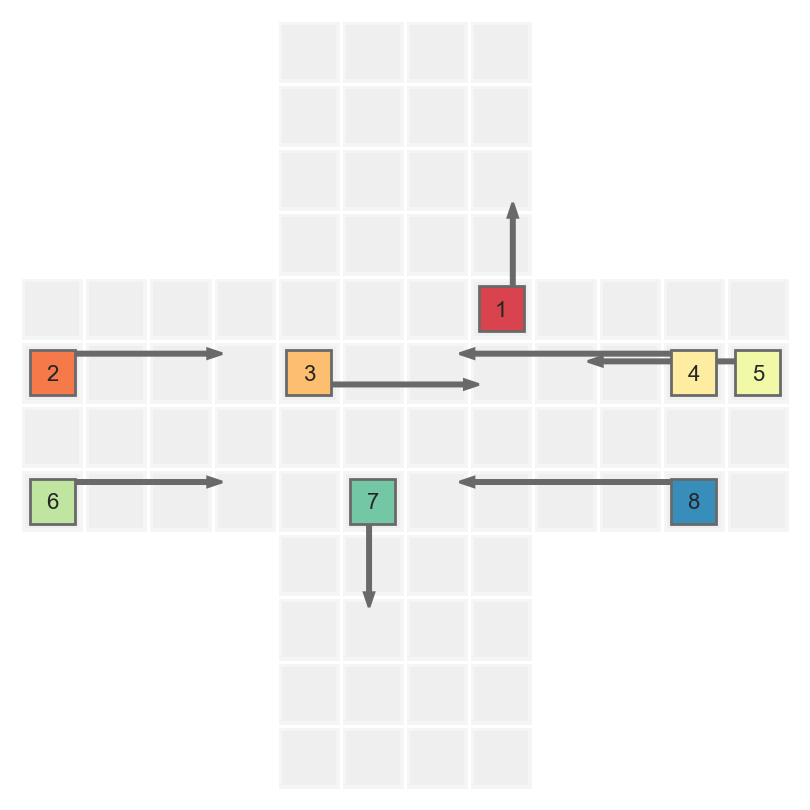

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-50Cases-5Iterations-policy-nuanced
------------------------------------------------------------------------------------------------------------
policyMap =
 [[0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]]


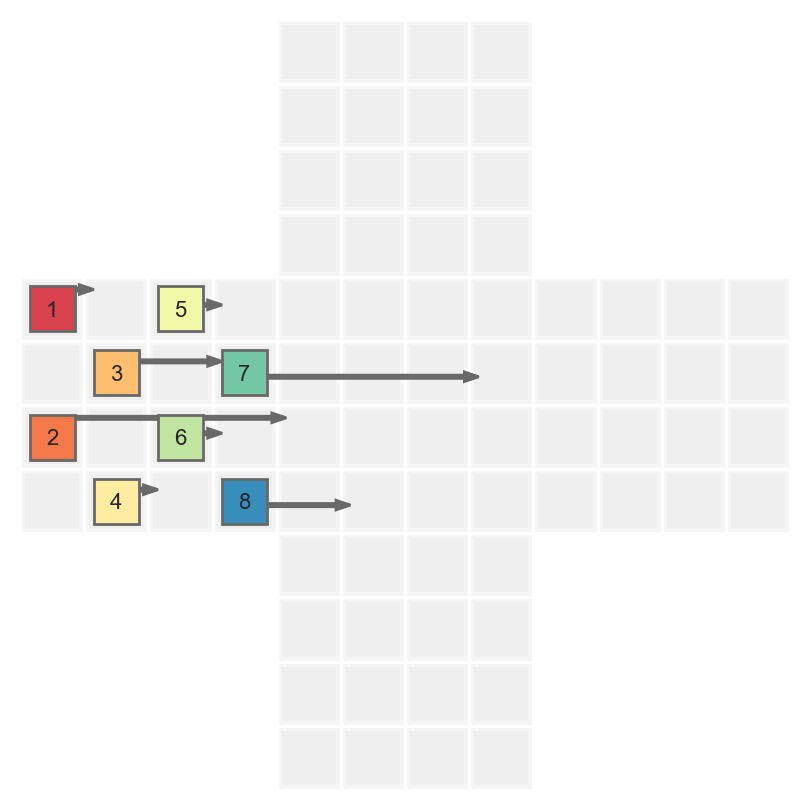

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-50Cases-5Iterations-policy-random
------------------------------------------------------------------------------------------------------------


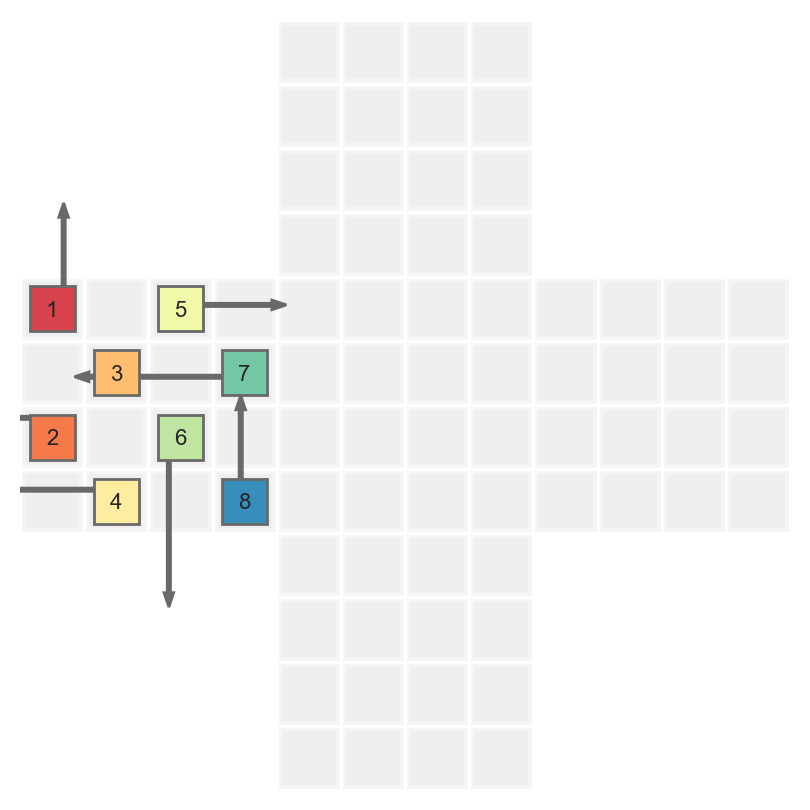

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-5Cases-3Iterations-Random
------------------------------------------------------------------------------------------------------------


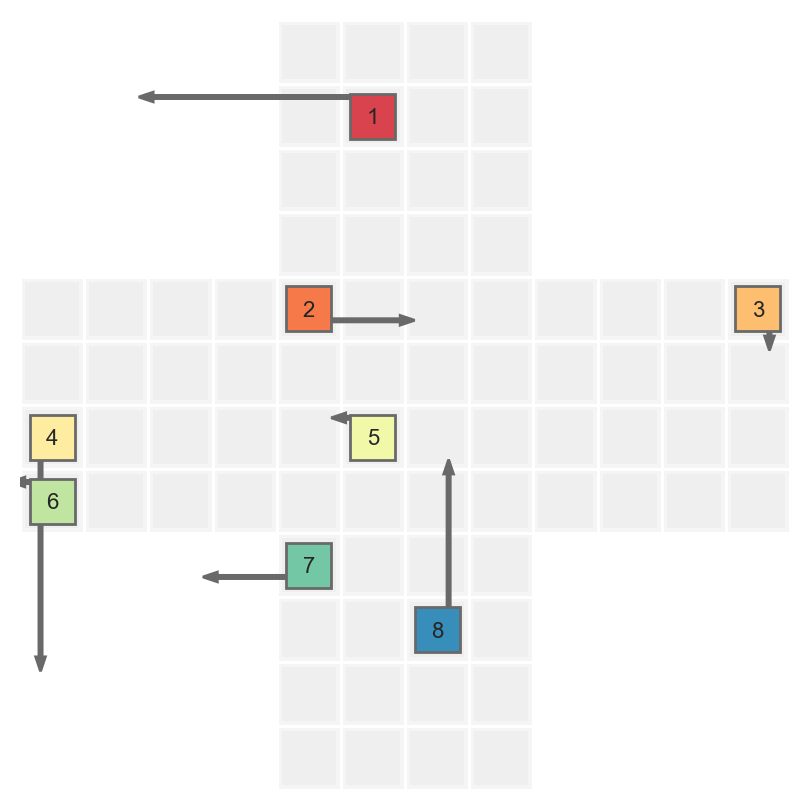

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-5Cases-3Iterations-policy
------------------------------------------------------------------------------------------------------------
policyMap =
 [[0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]]


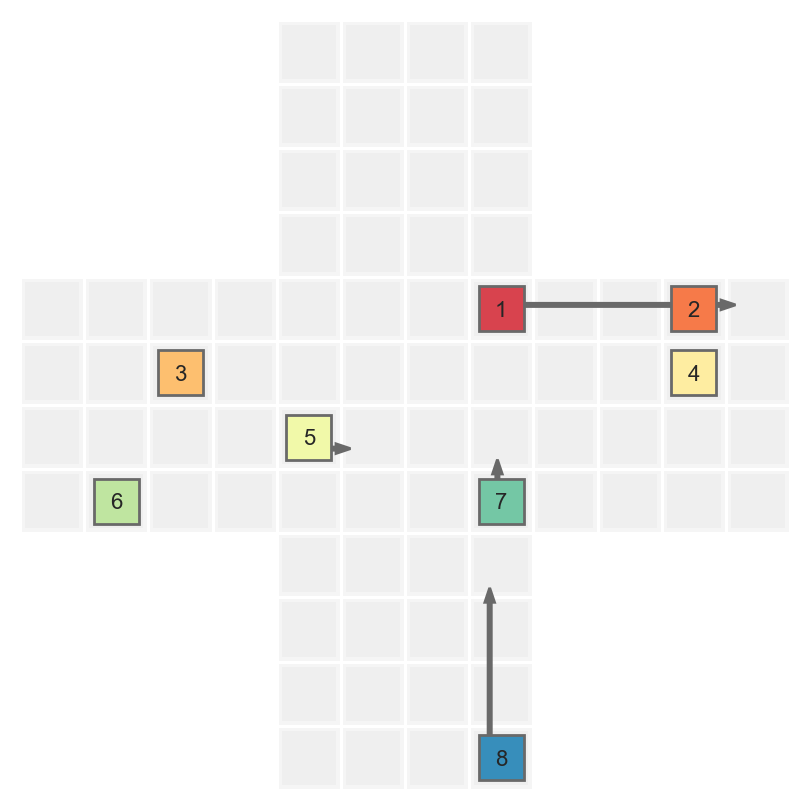

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-5Cases-3Iterations-policy-aggressive
------------------------------------------------------------------------------------------------------------
policyMap =
 [[0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]]


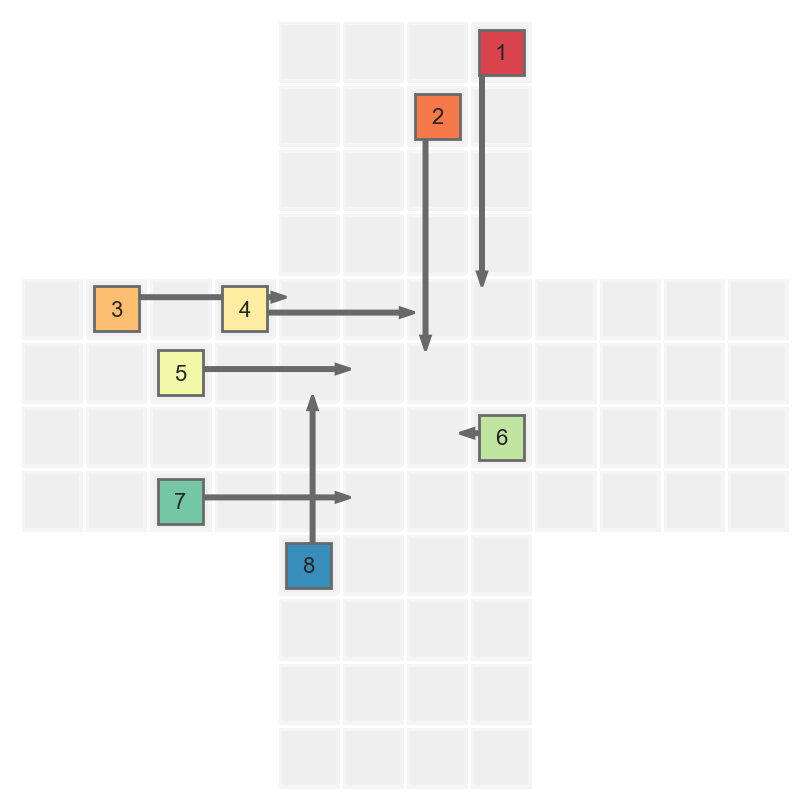

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-5Cases-3Iterations-policy-nuanced
------------------------------------------------------------------------------------------------------------
policyMap =
 [[0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [4 4 4 4 0 0 0 0 3 3 3 3]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]]


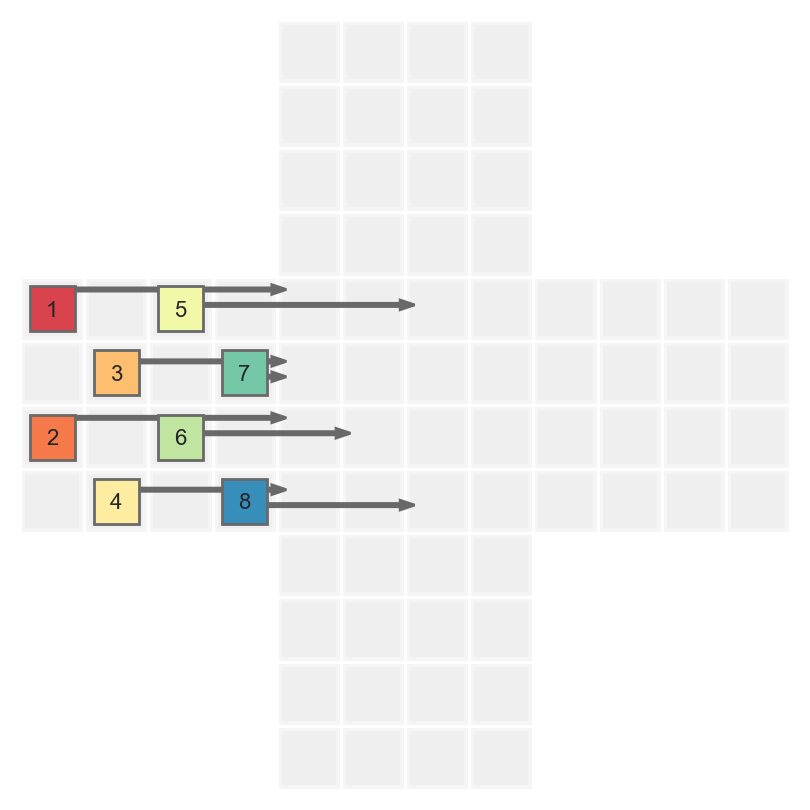

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection12by12-8Agents-5Cases-3Iterations-policy-random
------------------------------------------------------------------------------------------------------------


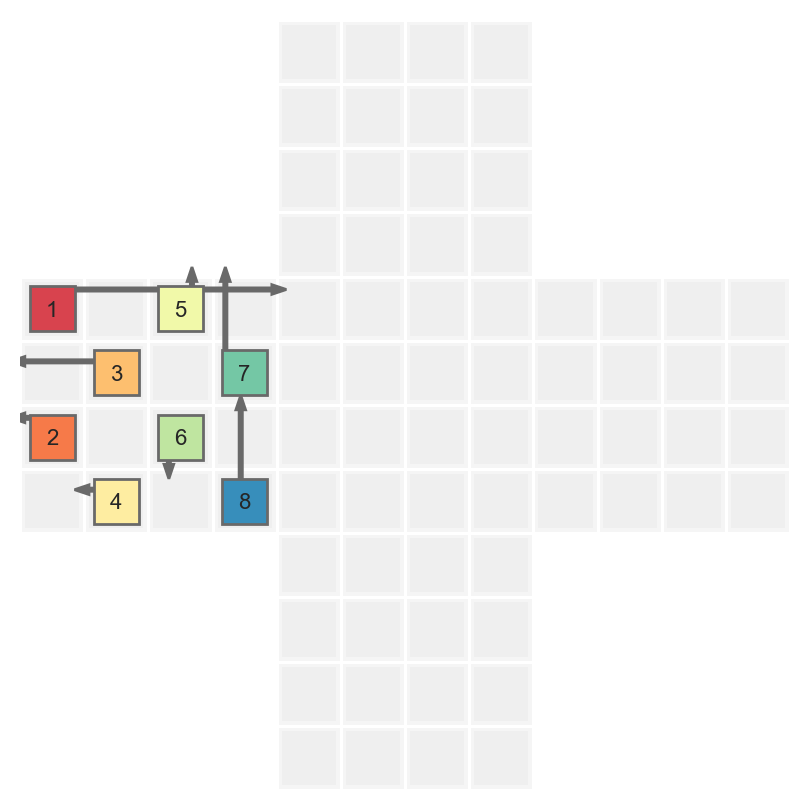

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
IntersectionGridlock
------------------------------------------------------------------------------------------------------------


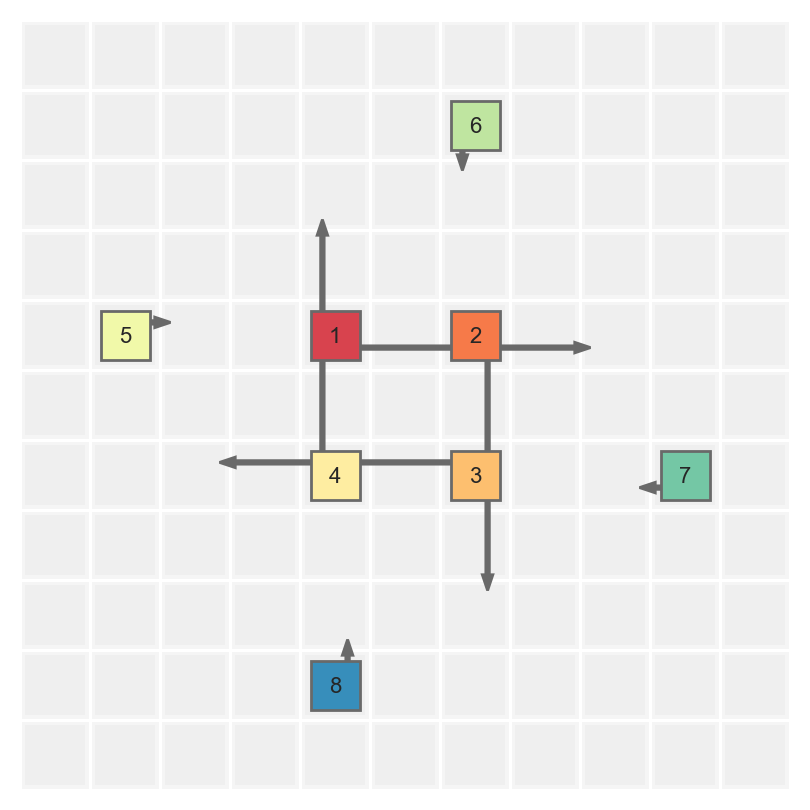

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
IntersectionGridlock0
------------------------------------------------------------------------------------------------------------


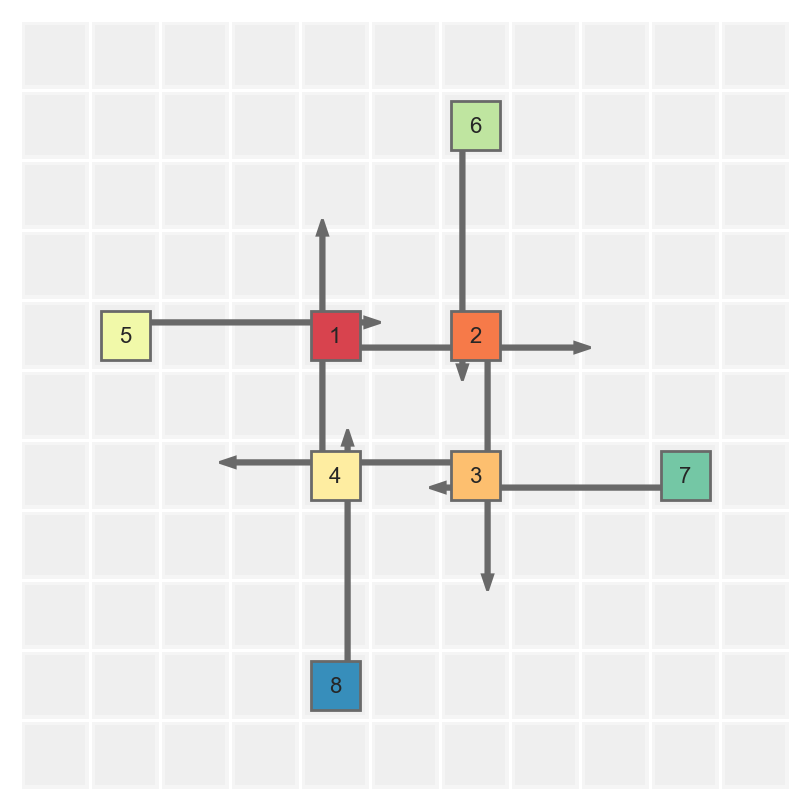

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
IntersectionGridlock1_crash
------------------------------------------------------------------------------------------------------------


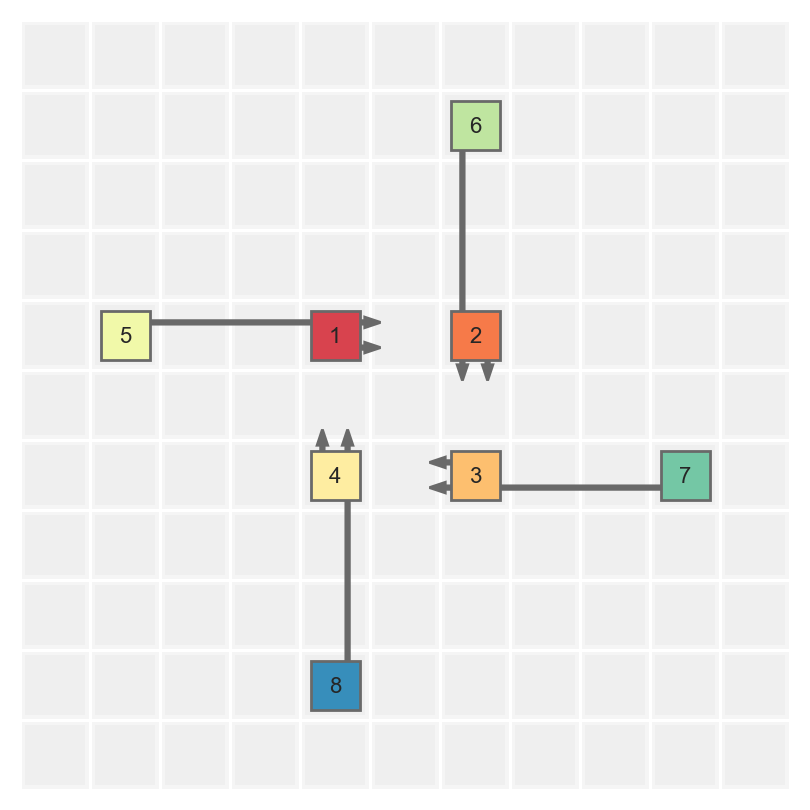

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Level 1
------------------------------------------------------------------------------------------------------------
policyMap =
 [[ 9  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 3  0  0  0  0  8  6  6  6  6  6  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  5  5  5  5  5  7  0  0  0  0  4]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [11  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10]]


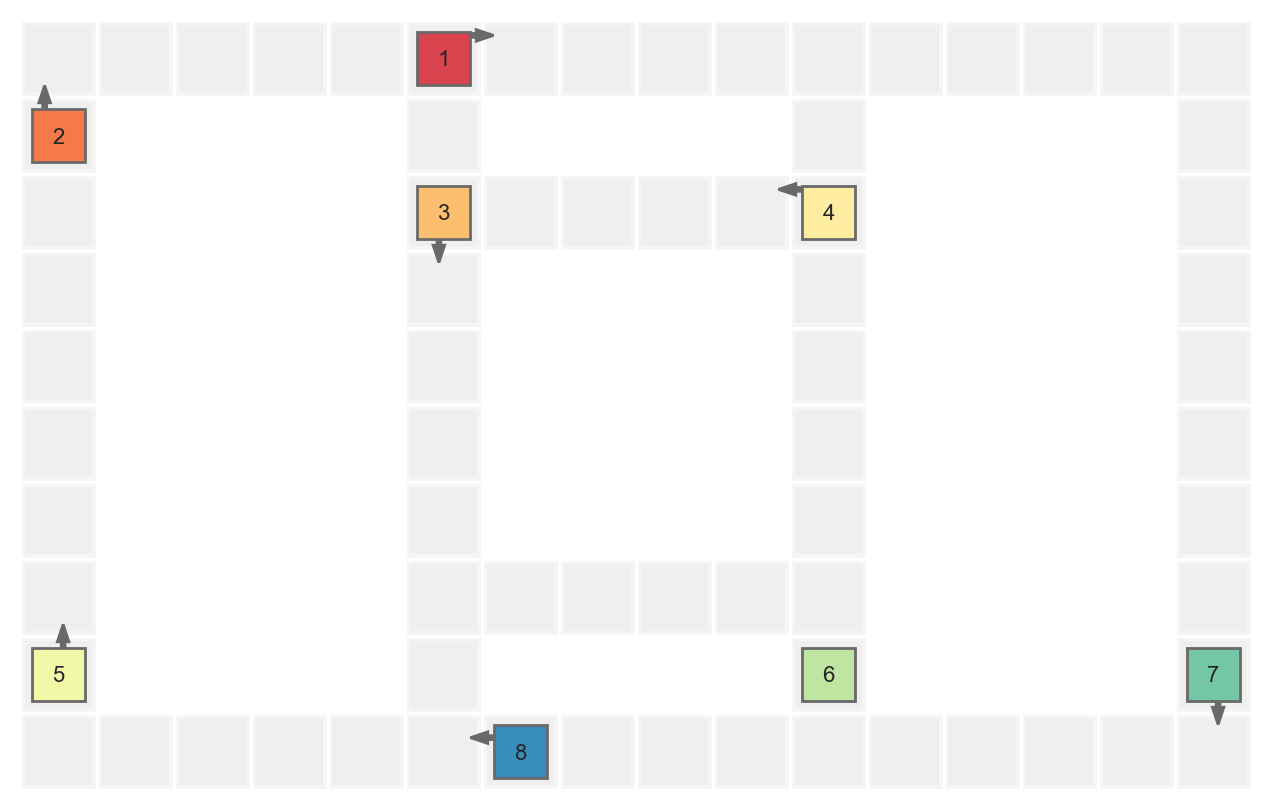

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Level 2
------------------------------------------------------------------------------------------------------------
policyMap =
 [[ 9  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 3  0  0  0  0  8  6  6  6  6  6  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  5  5  5  5  5  7  0  0  0  0  4]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [11  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10]]


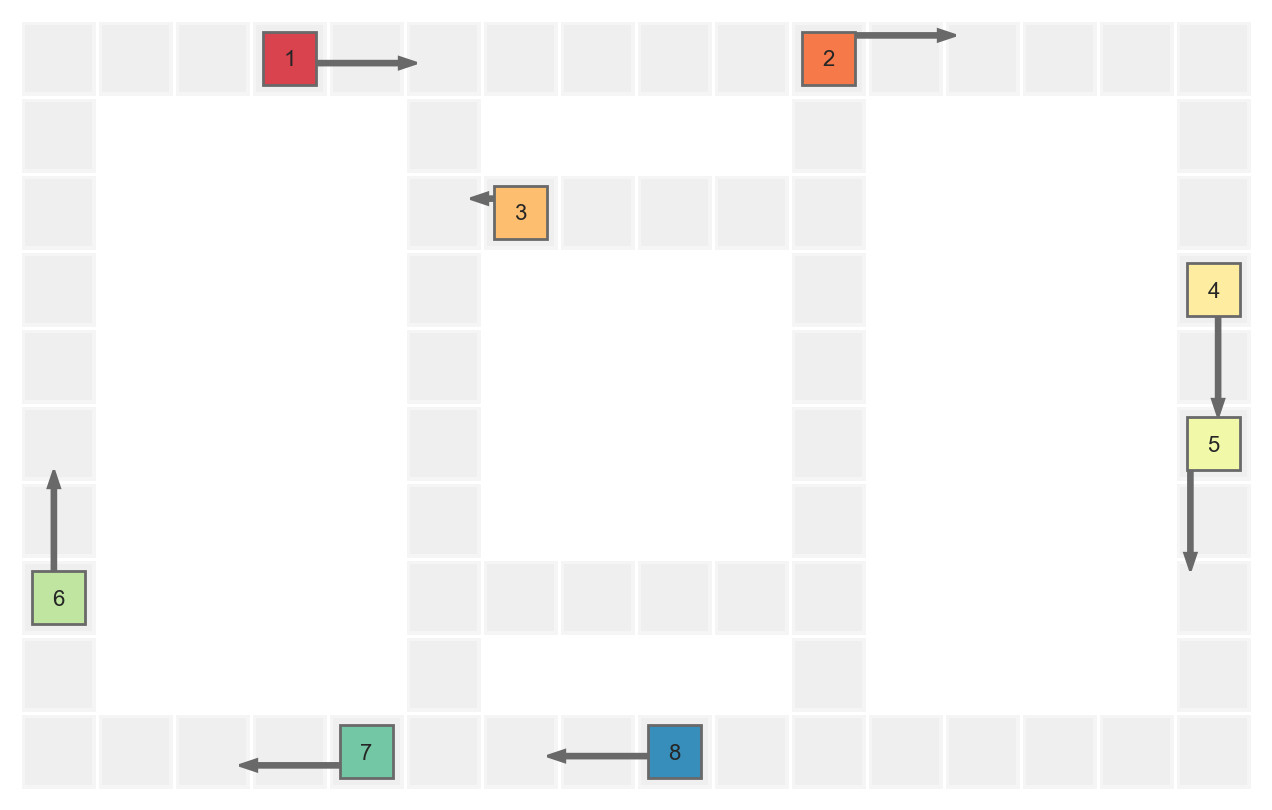

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Level 3
------------------------------------------------------------------------------------------------------------
policyMap =
 [[ 9  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 3  0  0  0  0  8  6  6  6  6  6  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  5  5  5  5  5  7  0  0  0  0  4]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [11  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10]]


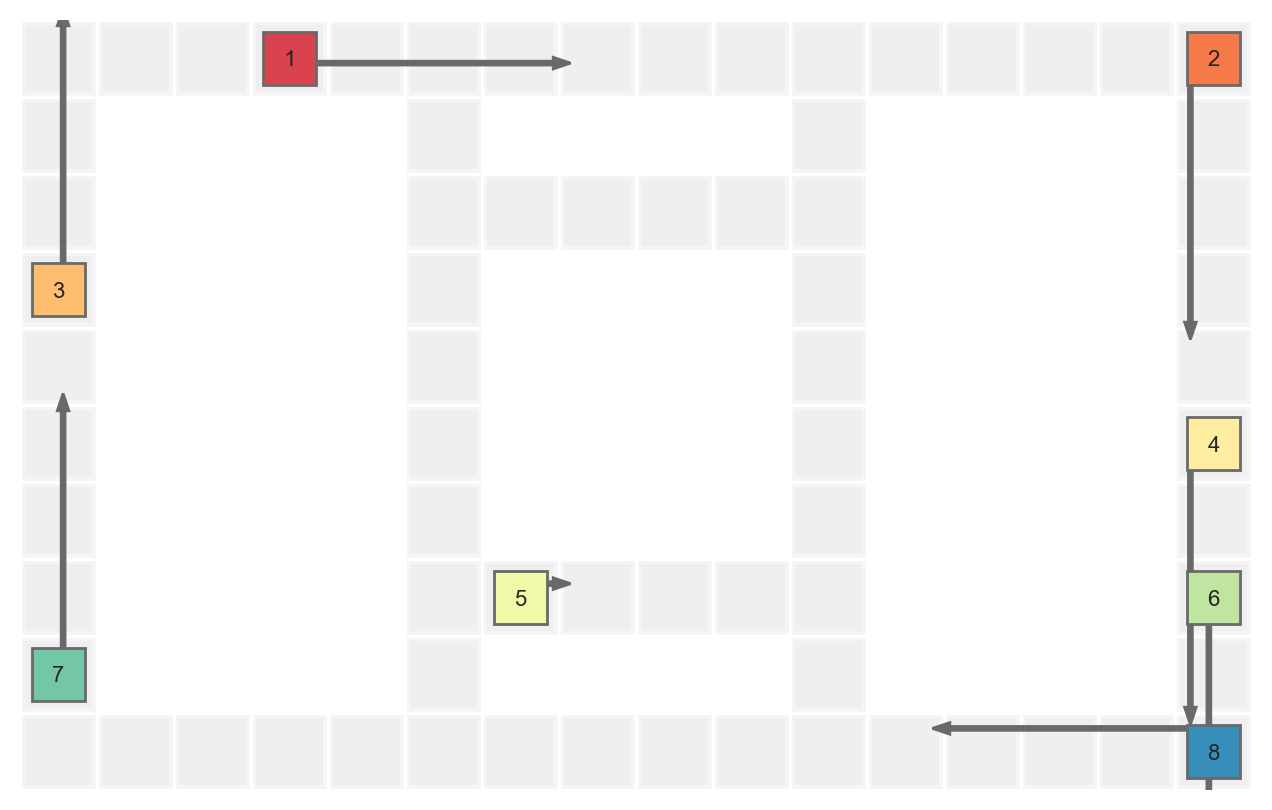

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Level 4
------------------------------------------------------------------------------------------------------------
policyMap =
 [[ 9  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 3  0  0  0  0  8  6  6  6  6  6  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  5  5  5  5  5  7  0  0  0  0  4]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [11  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10]]


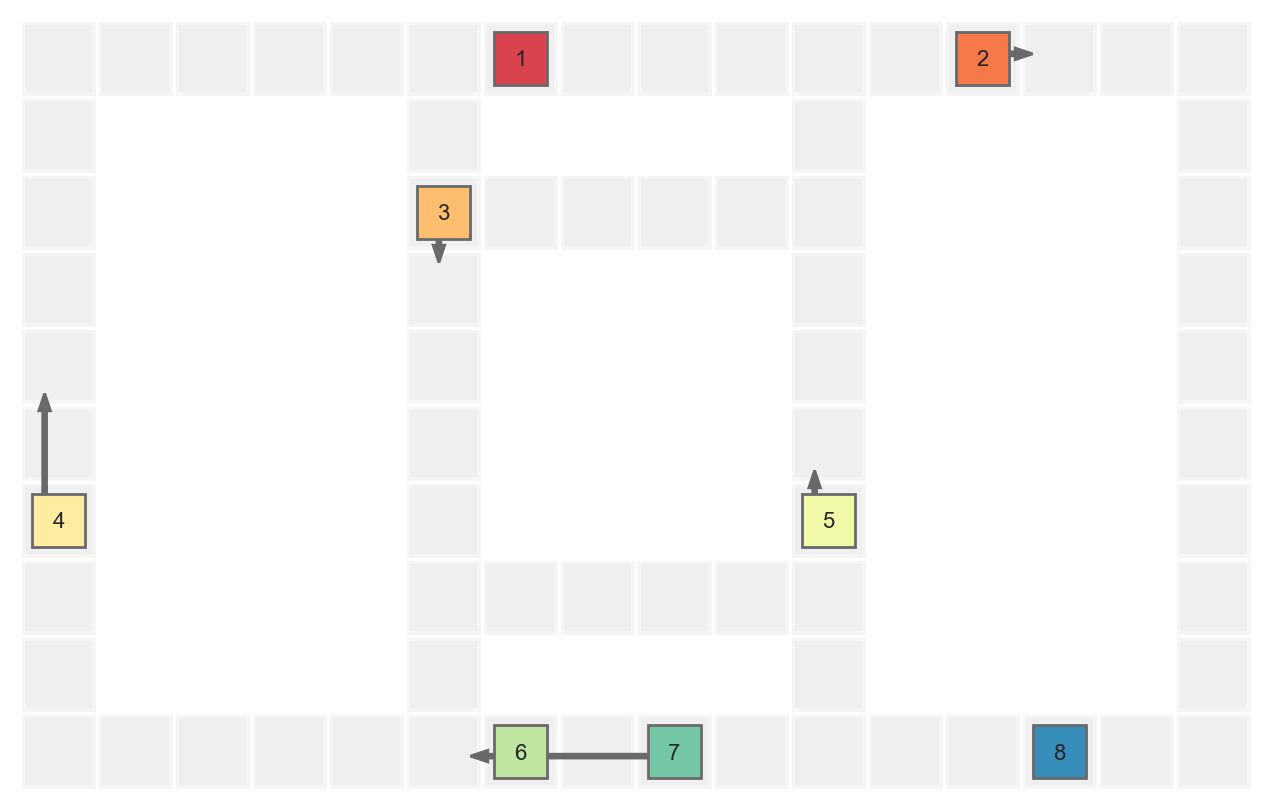

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Level 5
------------------------------------------------------------------------------------------------------------
policyMap =
 [[ 9  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 3  0  0  0  0  8  6  6  6  6  6  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  8  0  0  0  0  7  0  0  0  0  4]
 [ 3  0  0  0  0  5  5  5  5  5  7  0  0  0  0  4]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [11  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10]]


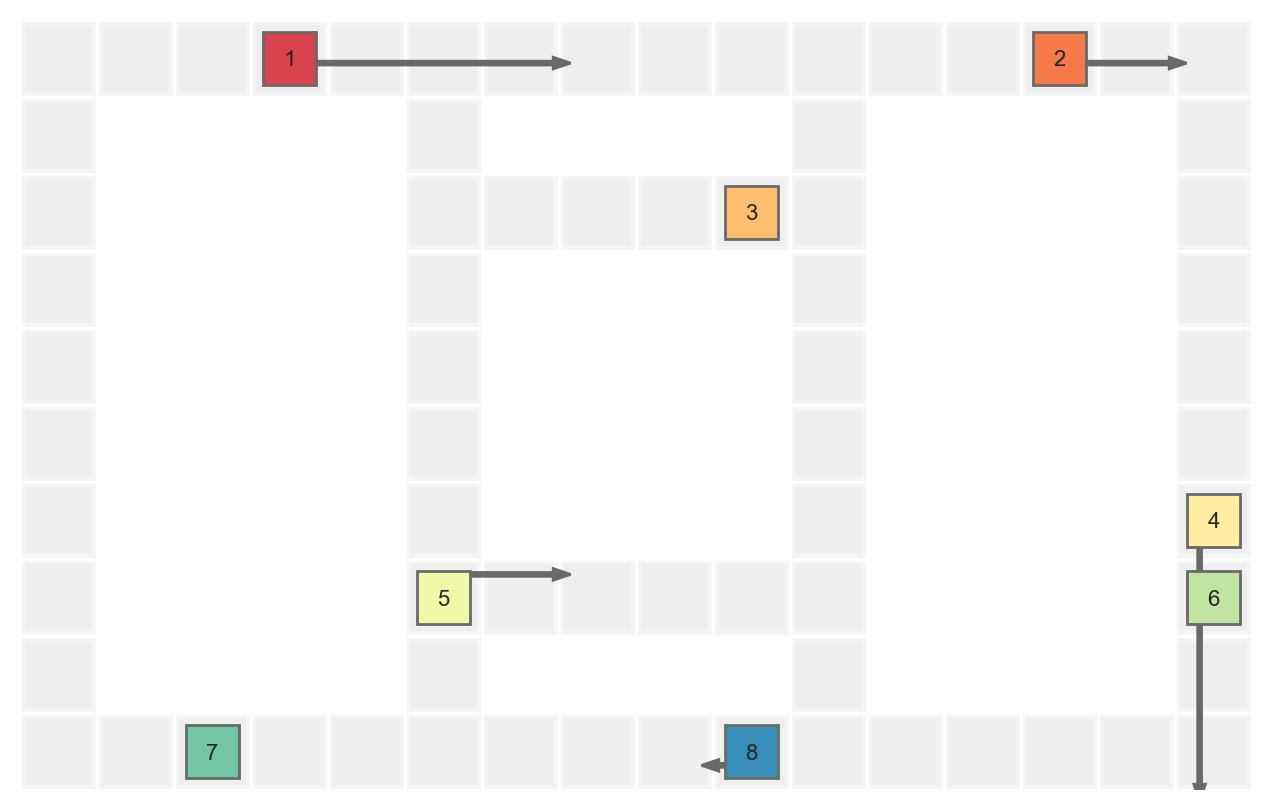

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Map-2Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


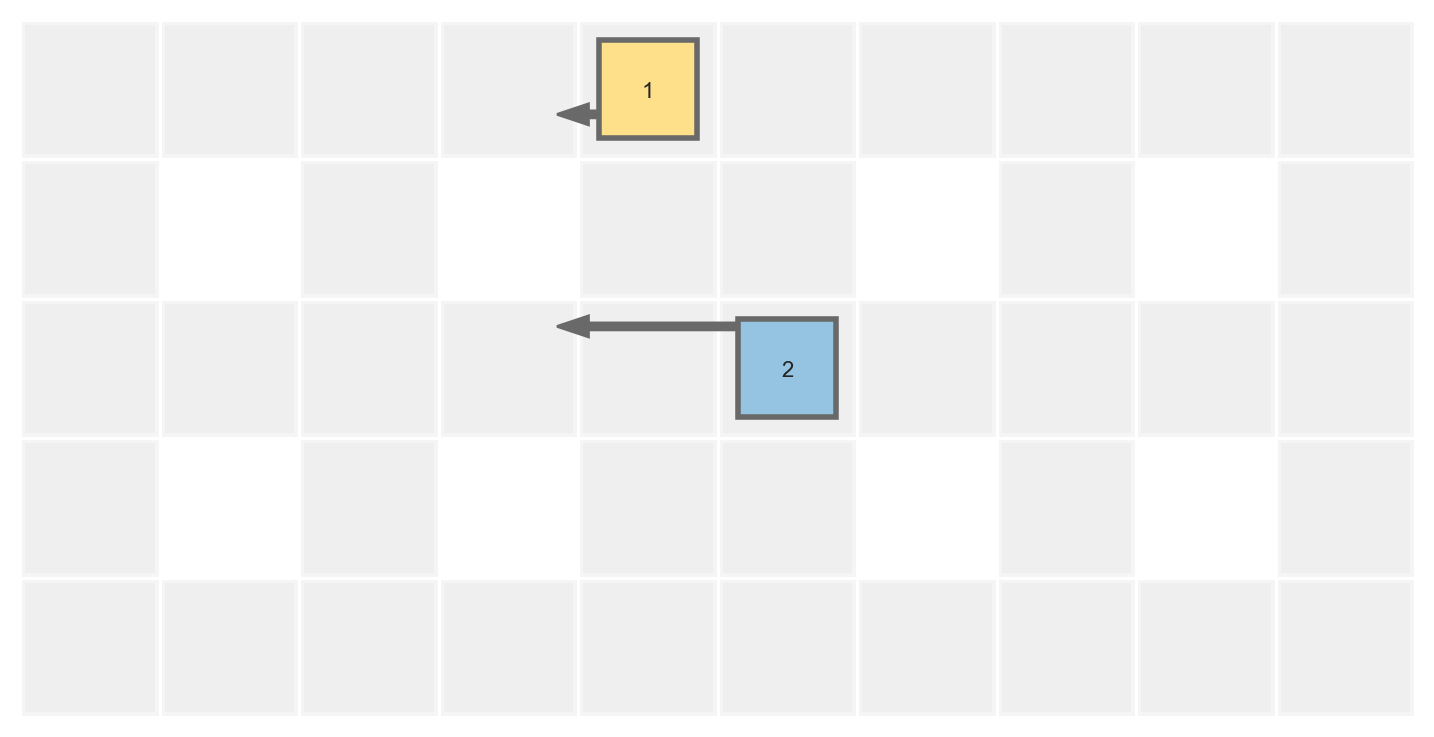

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Map-5Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


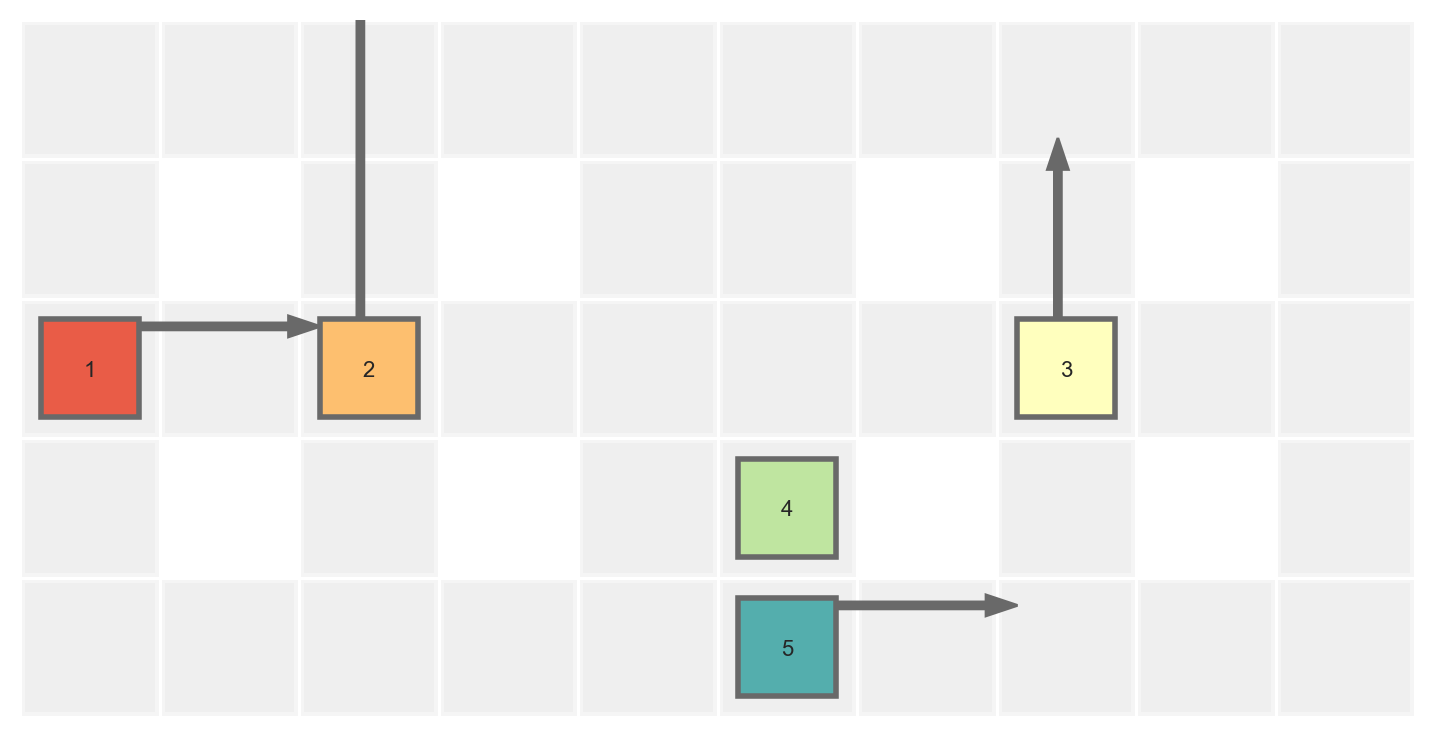

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
MediatedCoupled
------------------------------------------------------------------------------------------------------------


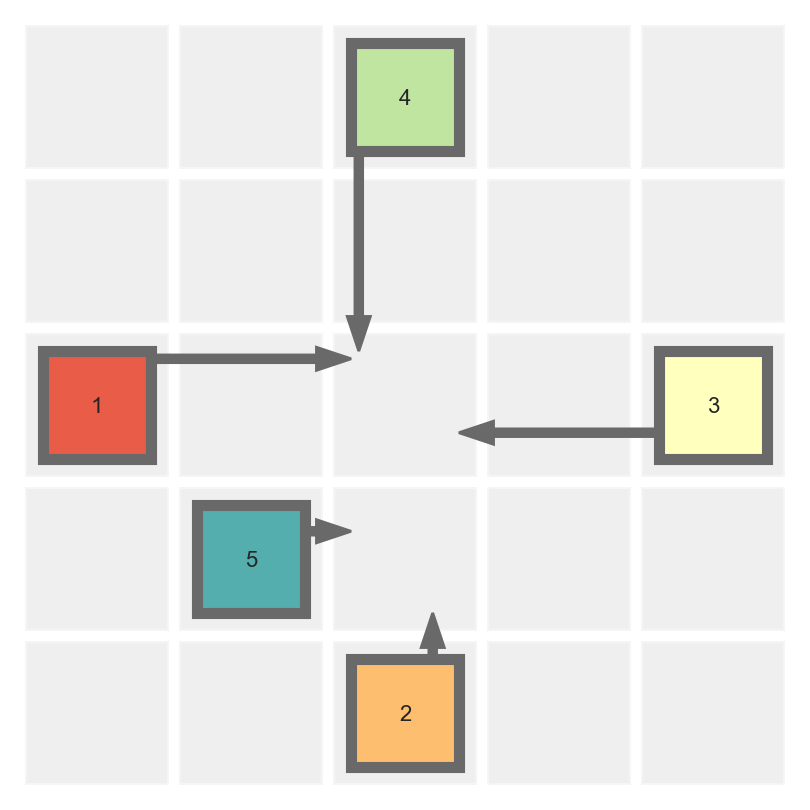

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
PaperSimple1
------------------------------------------------------------------------------------------------------------


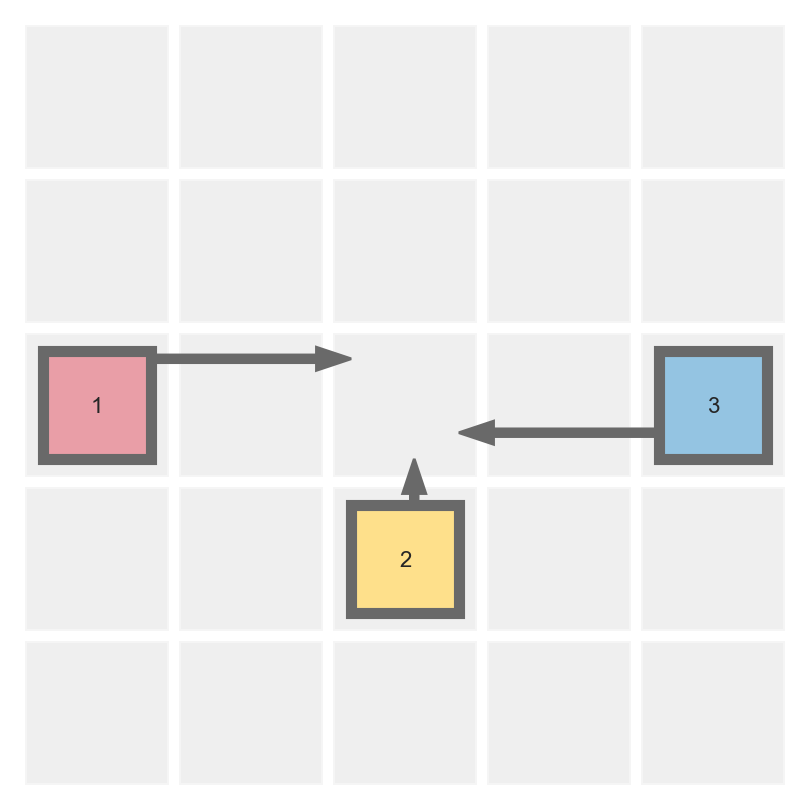

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
PaperSimple2
------------------------------------------------------------------------------------------------------------


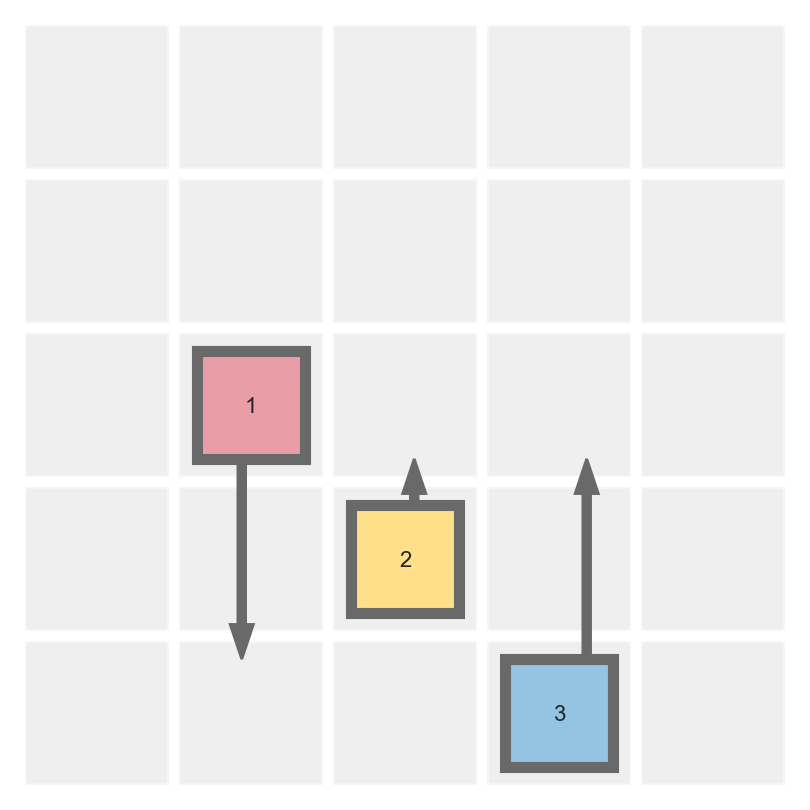

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
PaperSimple3
------------------------------------------------------------------------------------------------------------


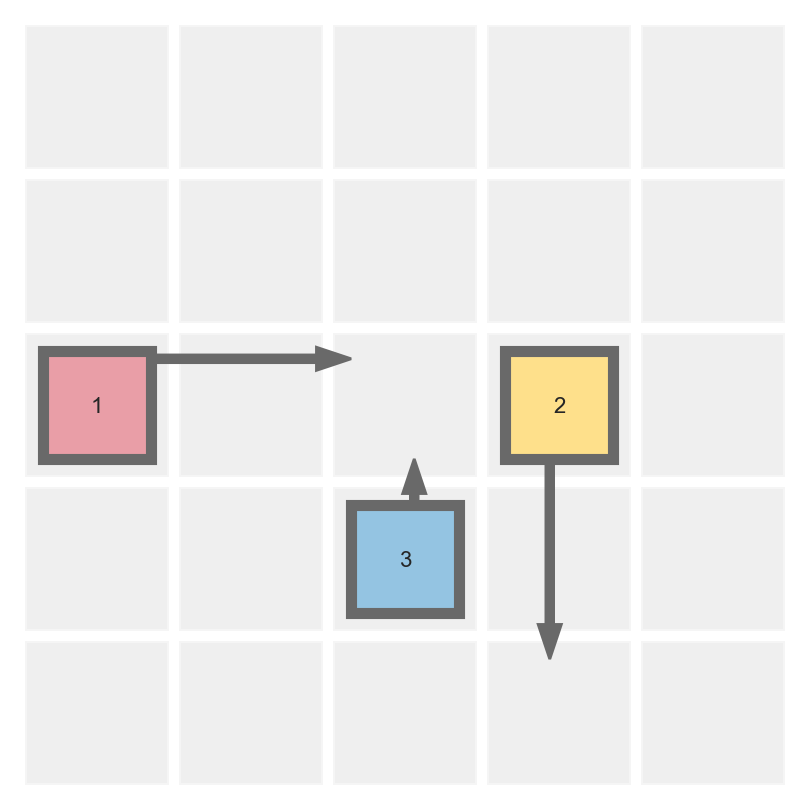

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Populated grid
------------------------------------------------------------------------------------------------------------


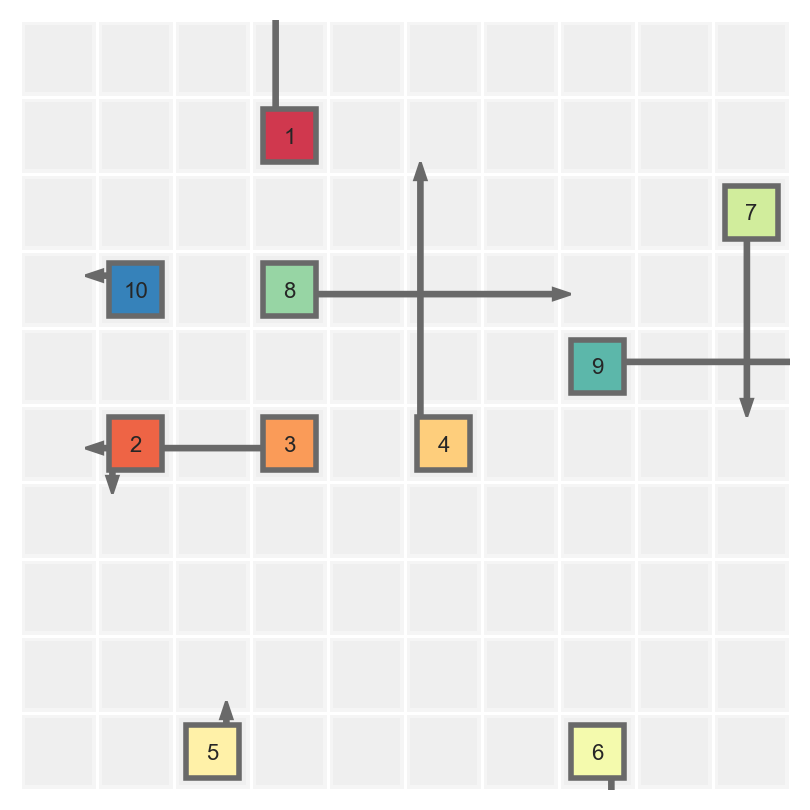

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
ProveHelper
------------------------------------------------------------------------------------------------------------


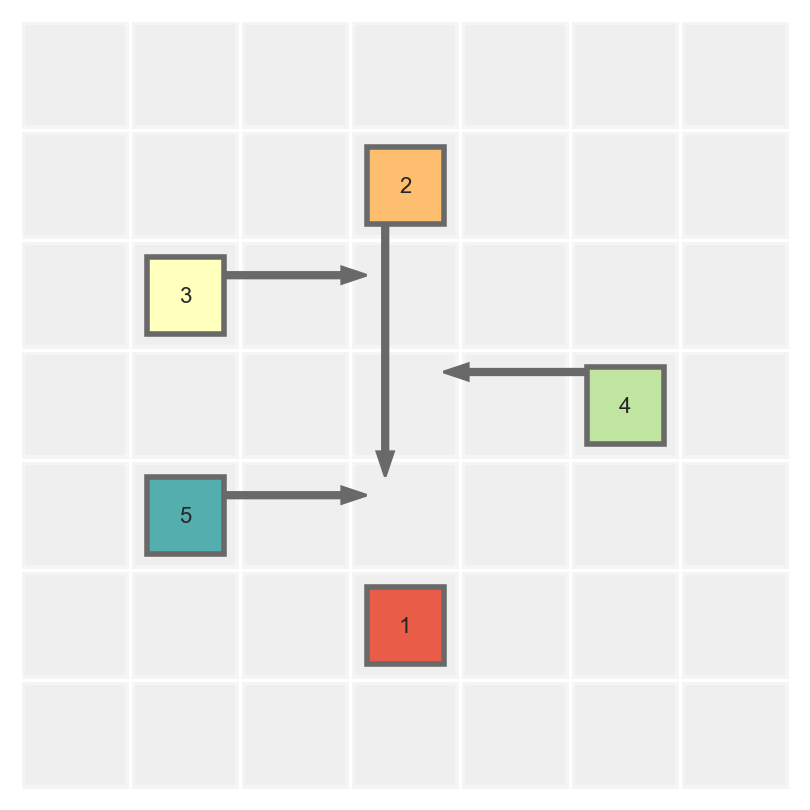

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
ProveHelper1
------------------------------------------------------------------------------------------------------------


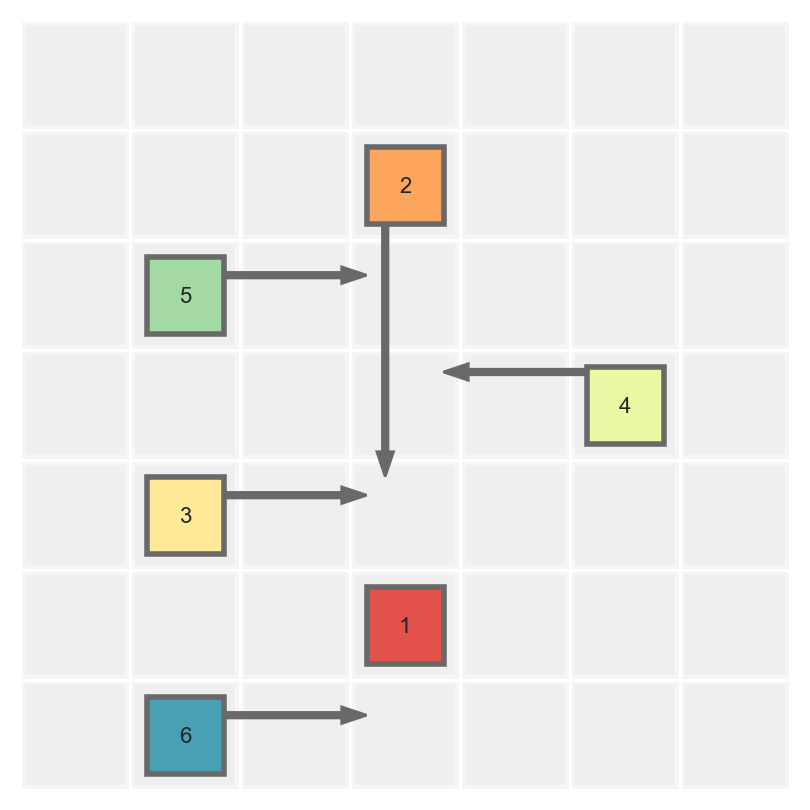

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
ProveHelper2
------------------------------------------------------------------------------------------------------------


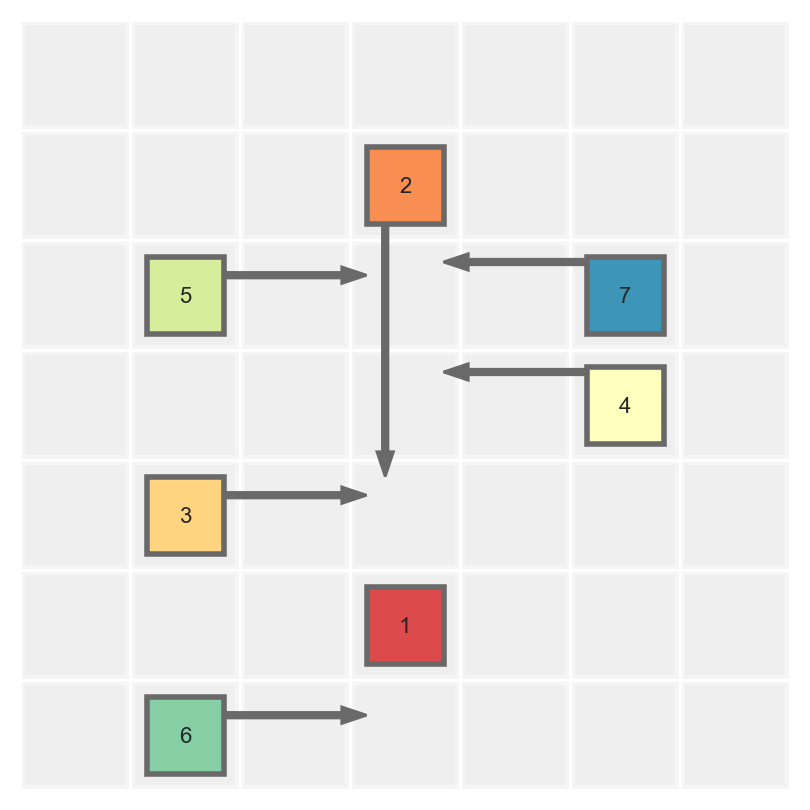

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Simple
------------------------------------------------------------------------------------------------------------


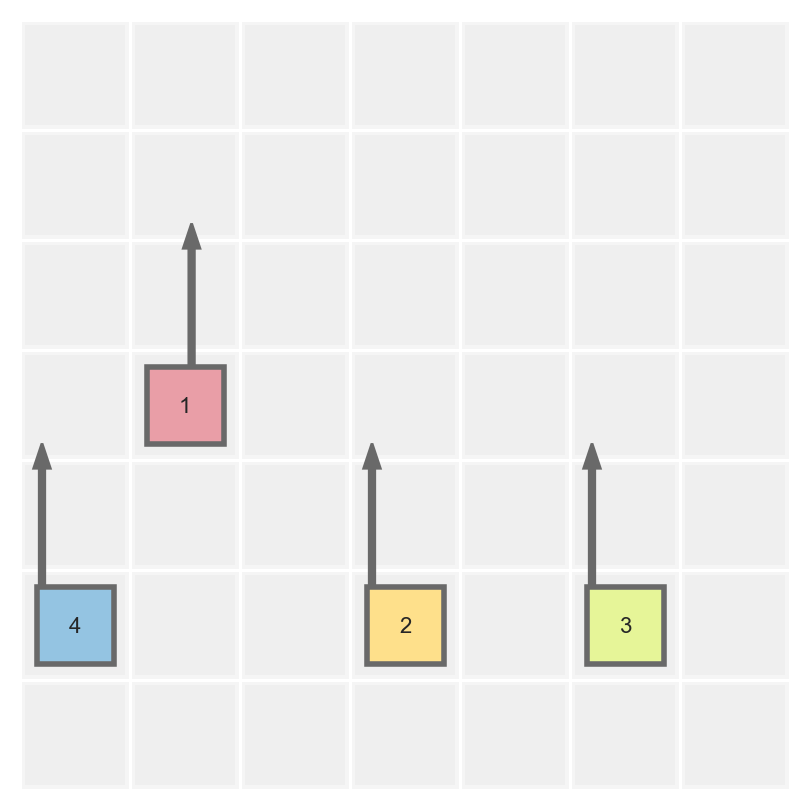

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Simple_1
------------------------------------------------------------------------------------------------------------


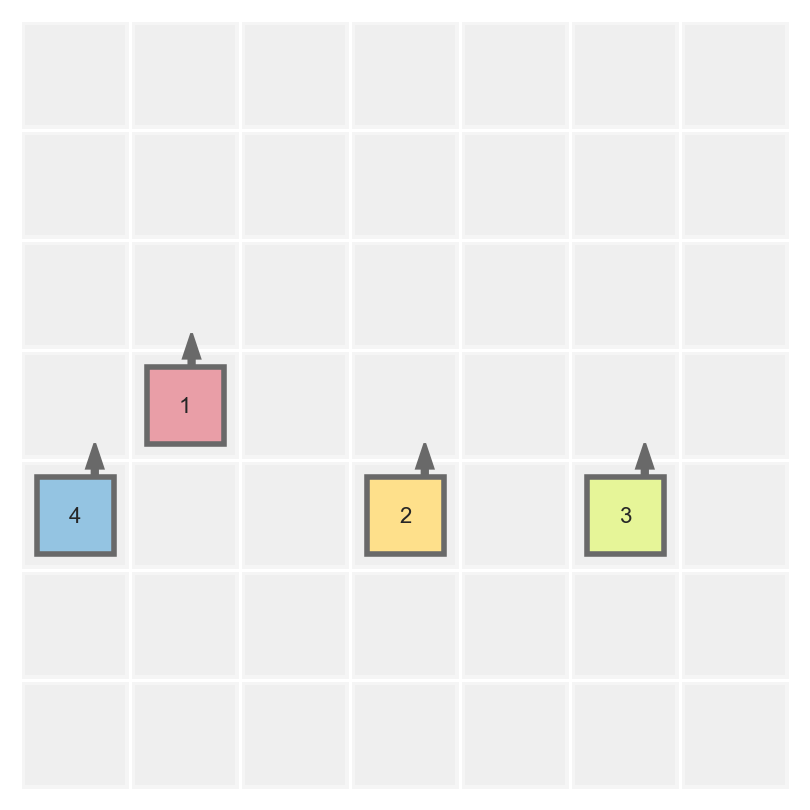

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Simple_2
------------------------------------------------------------------------------------------------------------


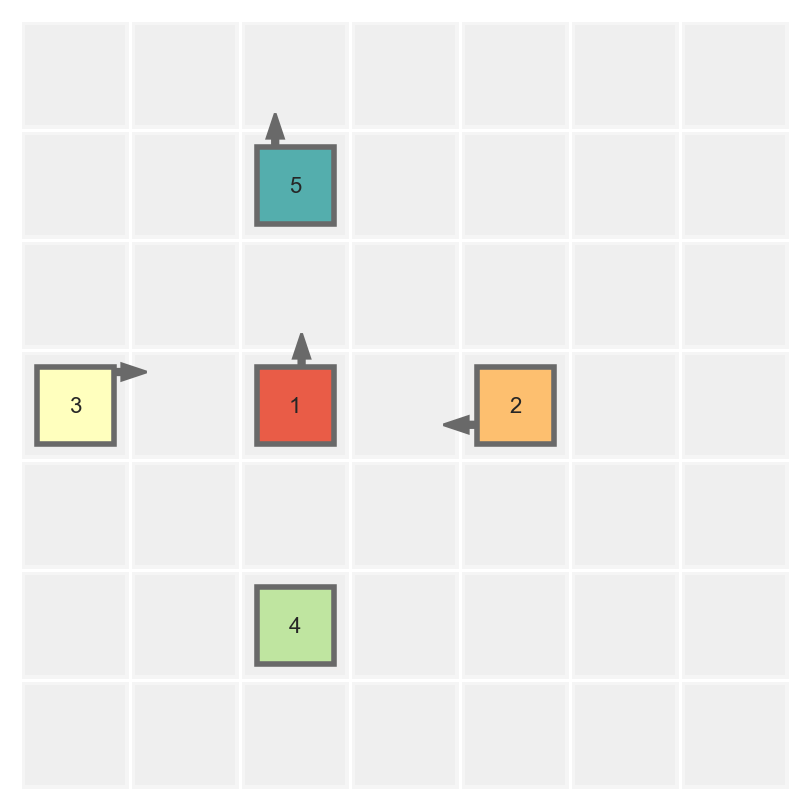

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane
------------------------------------------------------------------------------------------------------------


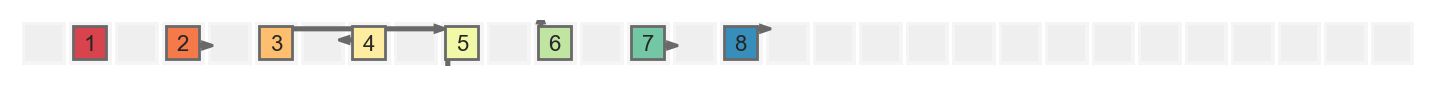

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents
------------------------------------------------------------------------------------------------------------


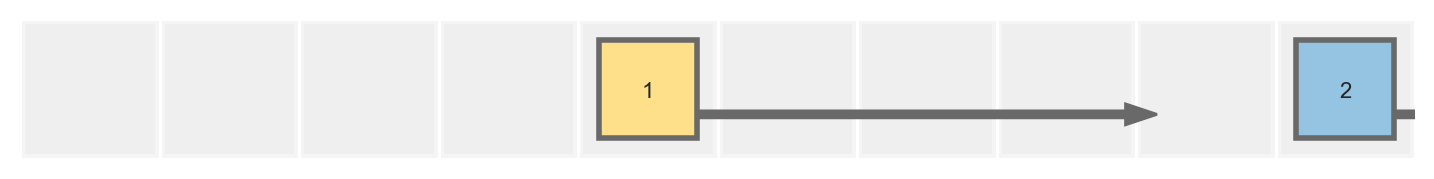

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-5Cases
------------------------------------------------------------------------------------------------------------


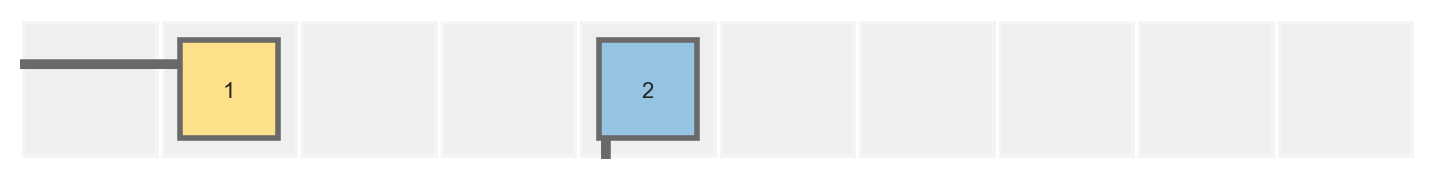

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10
------------------------------------------------------------------------------------------------------------


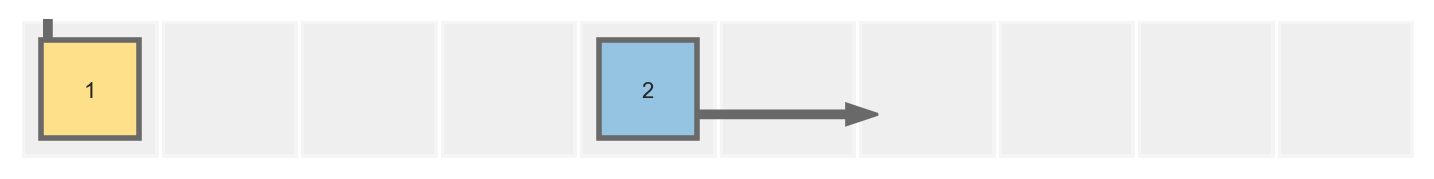

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-5
------------------------------------------------------------------------------------------------------------


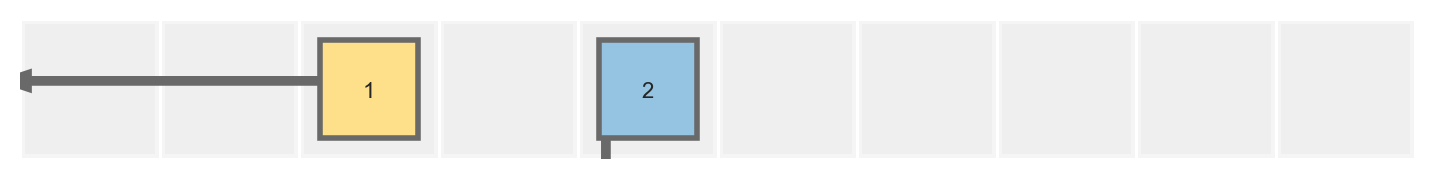

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-5-100Cases
------------------------------------------------------------------------------------------------------------


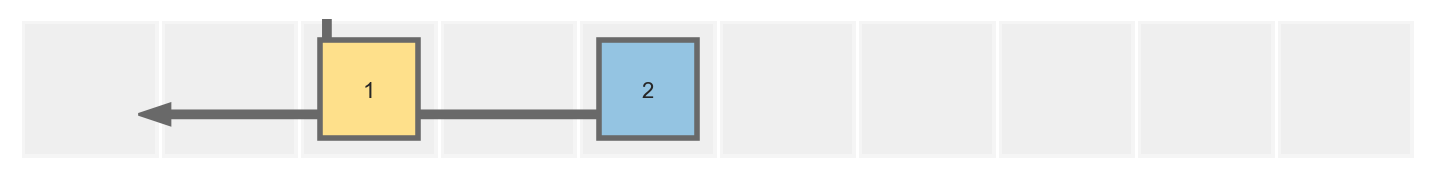

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-8
------------------------------------------------------------------------------------------------------------


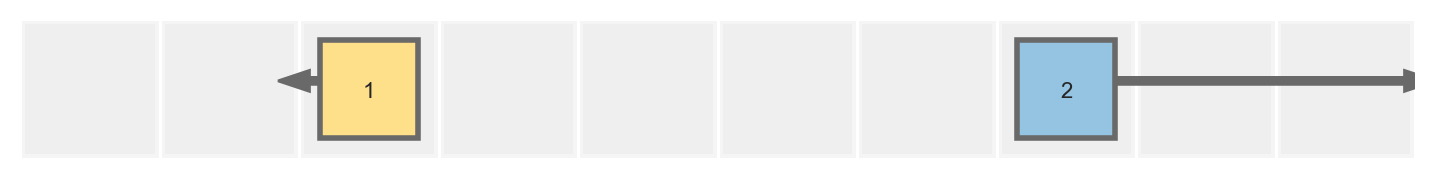

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-8-100Cases
------------------------------------------------------------------------------------------------------------


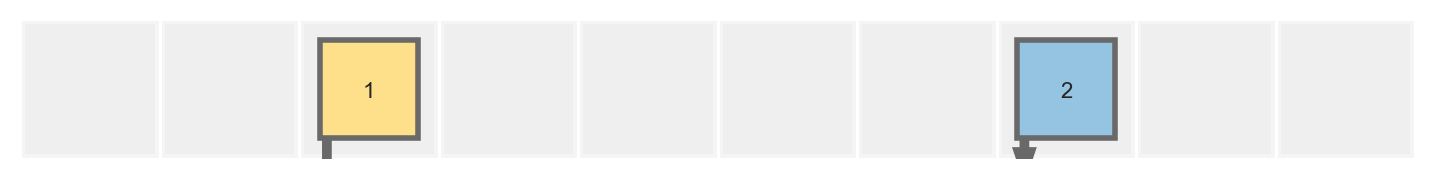

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length5
------------------------------------------------------------------------------------------------------------


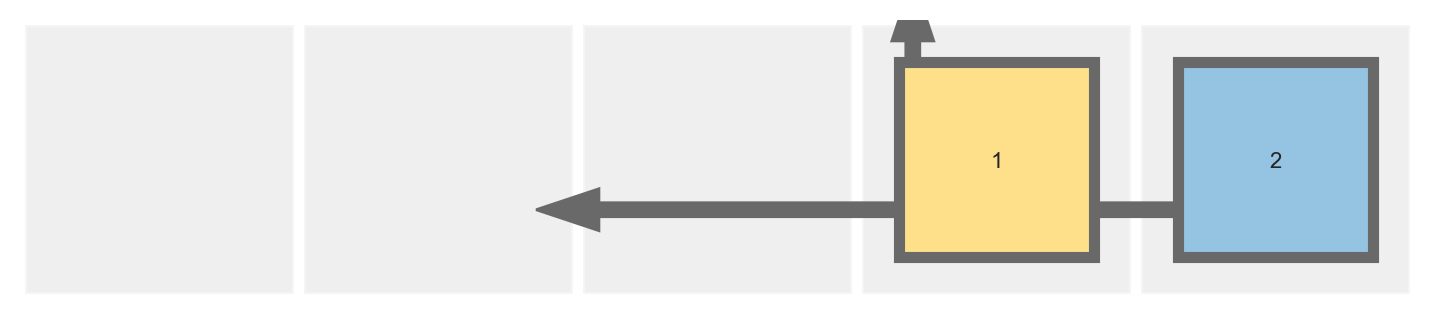

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-3Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


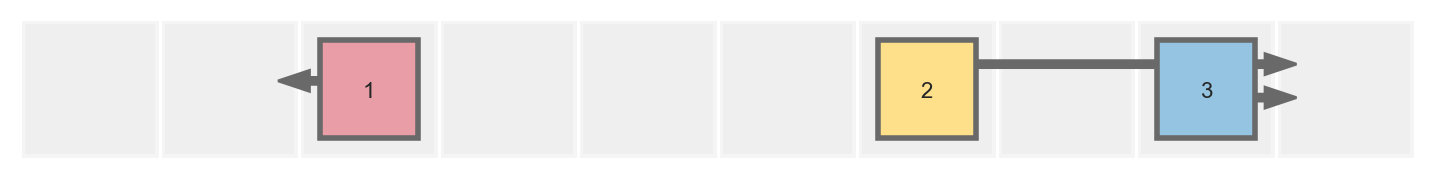

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-4Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


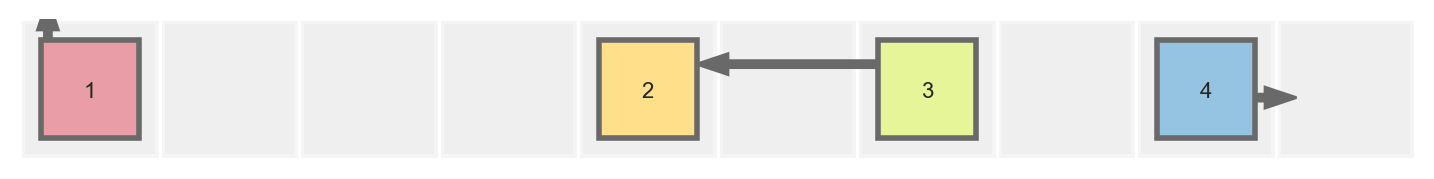

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents
------------------------------------------------------------------------------------------------------------


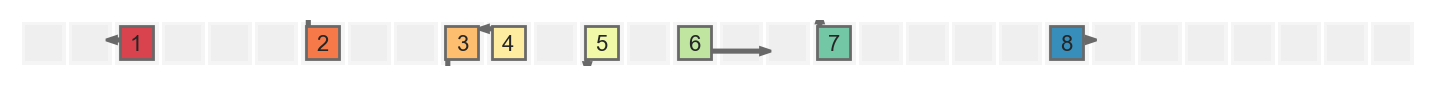

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents-5iterations
------------------------------------------------------------------------------------------------------------


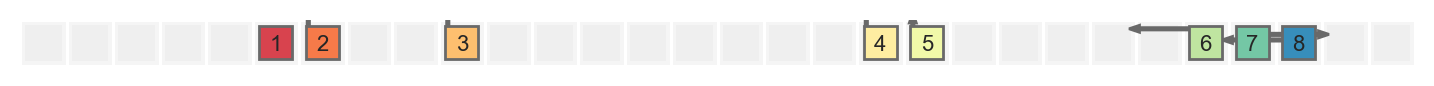

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents-5iterations-5cases
------------------------------------------------------------------------------------------------------------


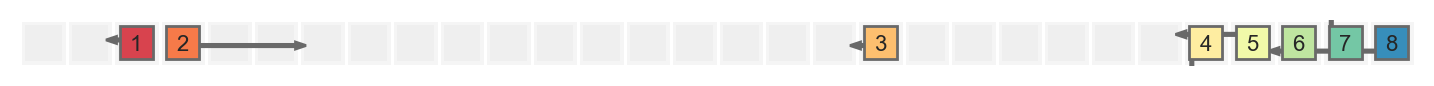

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents-Bidirectional
------------------------------------------------------------------------------------------------------------


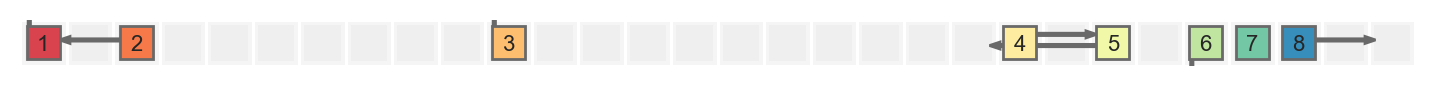

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-2Agents-AgentsAt-3-5
------------------------------------------------------------------------------------------------------------


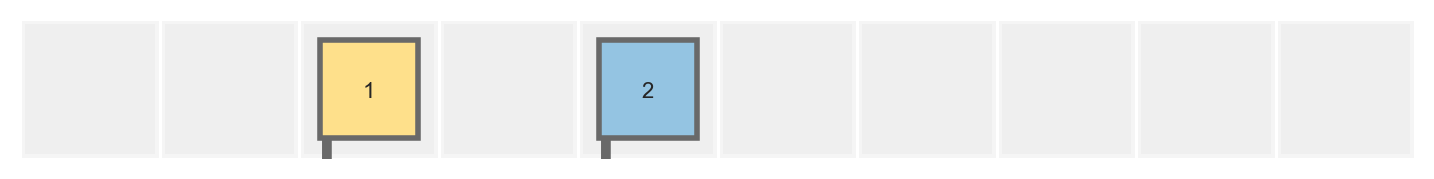

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-2Agents-AgentsAt-3-8
------------------------------------------------------------------------------------------------------------


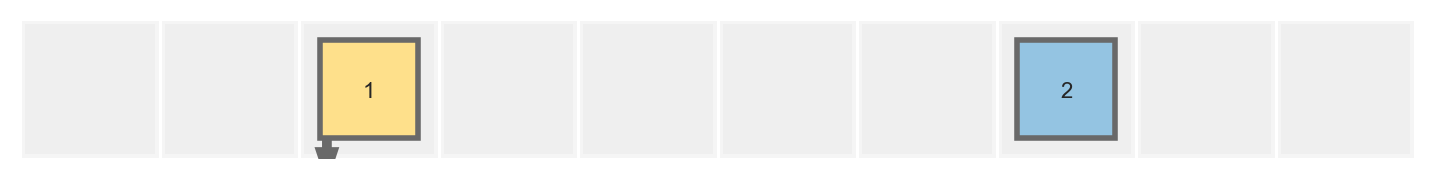

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-4Agents
------------------------------------------------------------------------------------------------------------


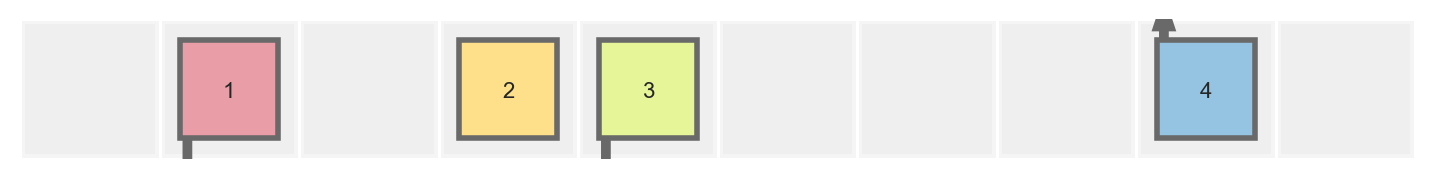

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-4Agents-2Way
------------------------------------------------------------------------------------------------------------


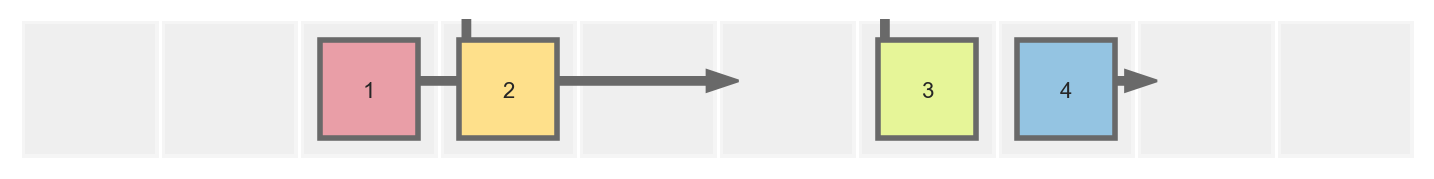

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane20-8Agents
------------------------------------------------------------------------------------------------------------


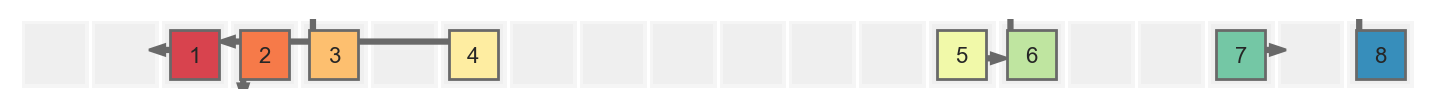

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane20-8Agents-2Way
------------------------------------------------------------------------------------------------------------


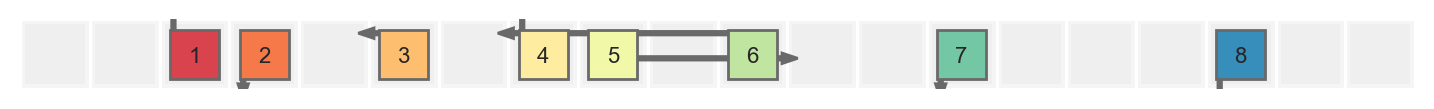

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Throuple
------------------------------------------------------------------------------------------------------------


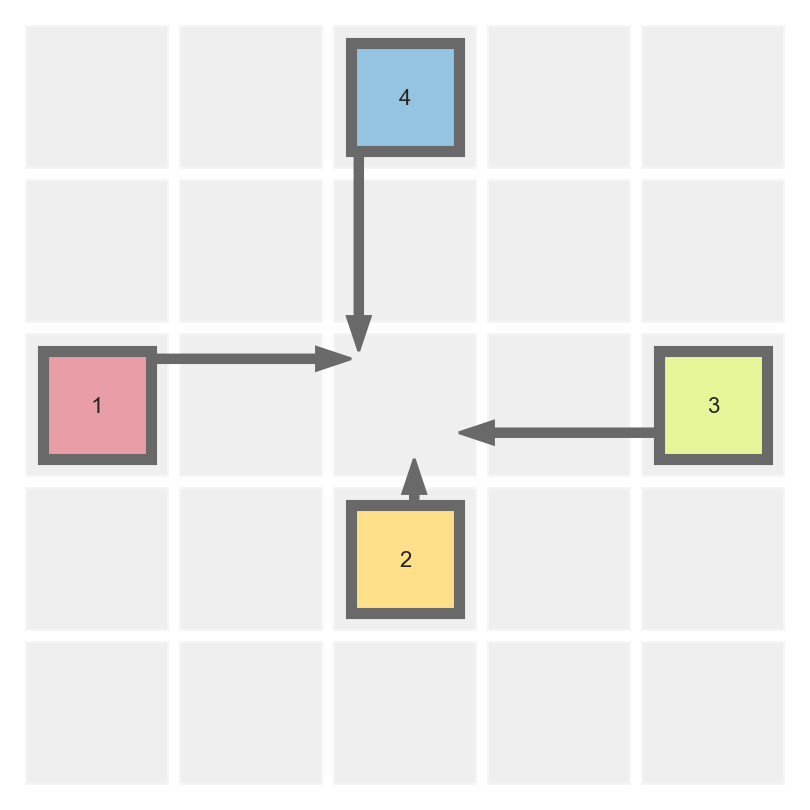

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Throuple2
------------------------------------------------------------------------------------------------------------


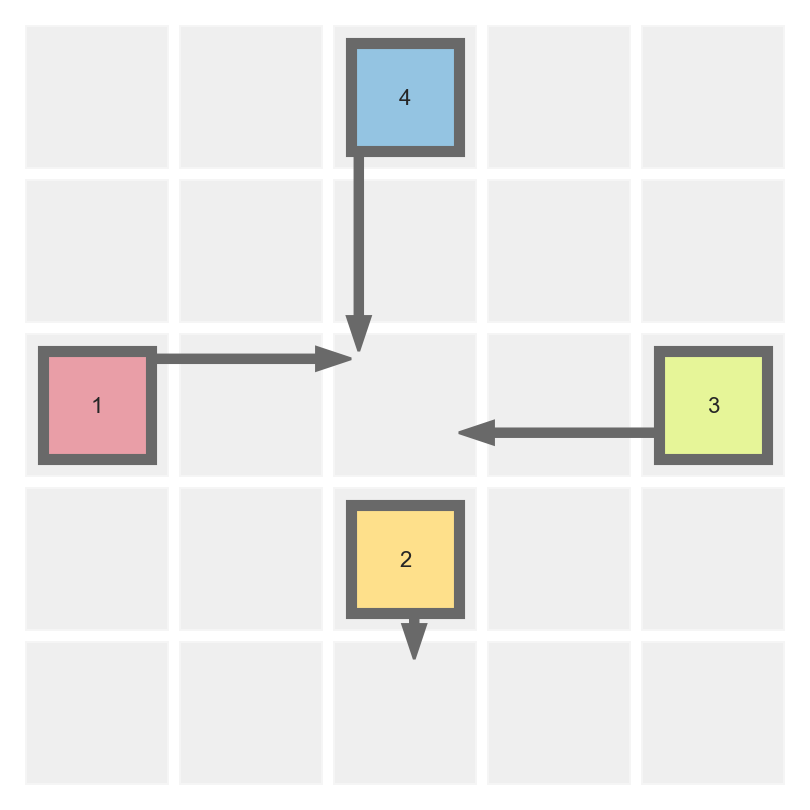

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Throuple3
------------------------------------------------------------------------------------------------------------


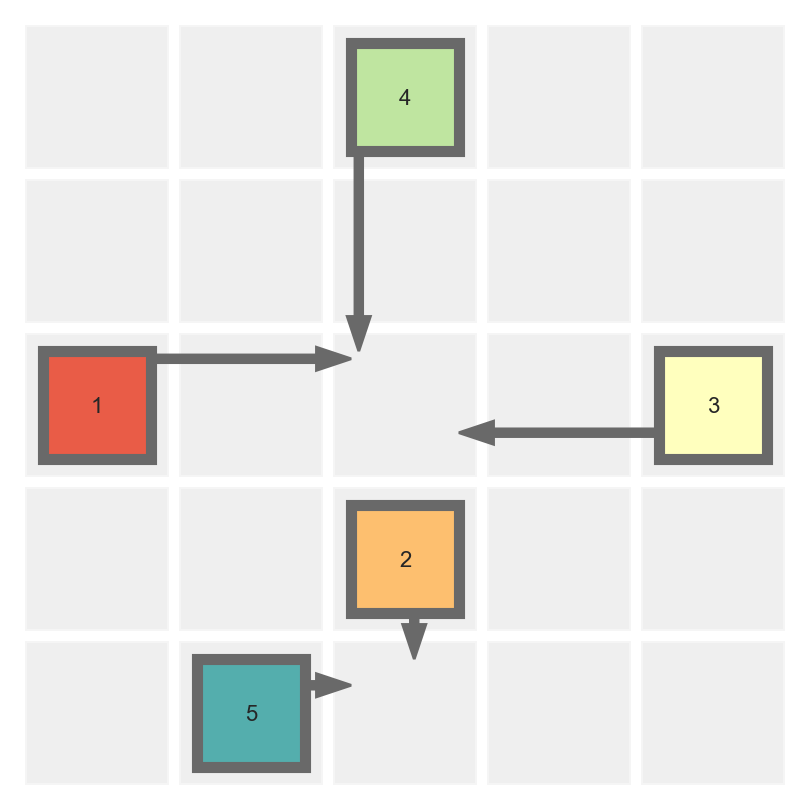

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Throuple4
------------------------------------------------------------------------------------------------------------


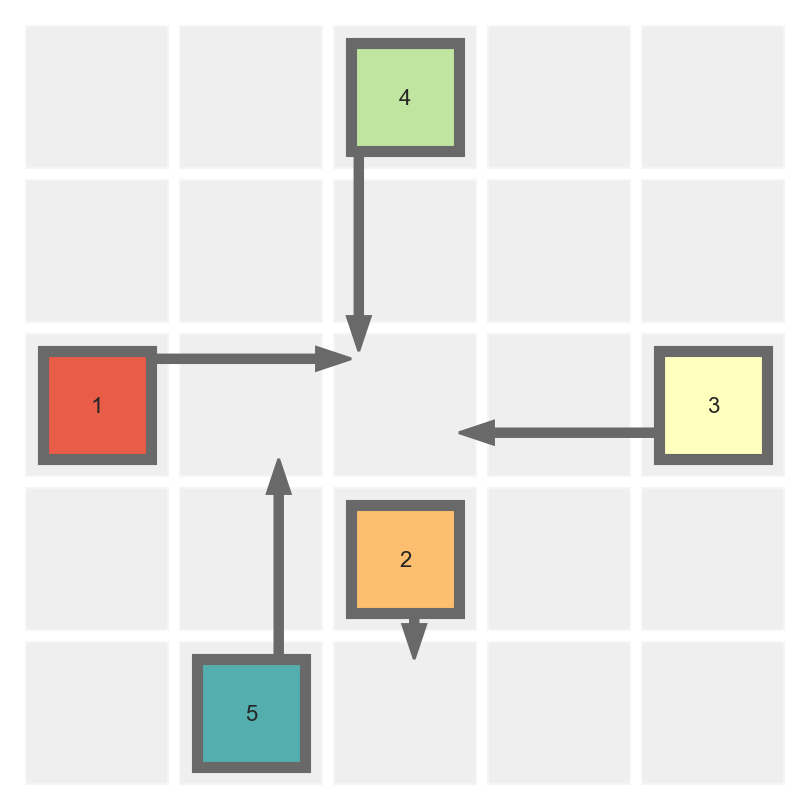

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Throuple5
------------------------------------------------------------------------------------------------------------


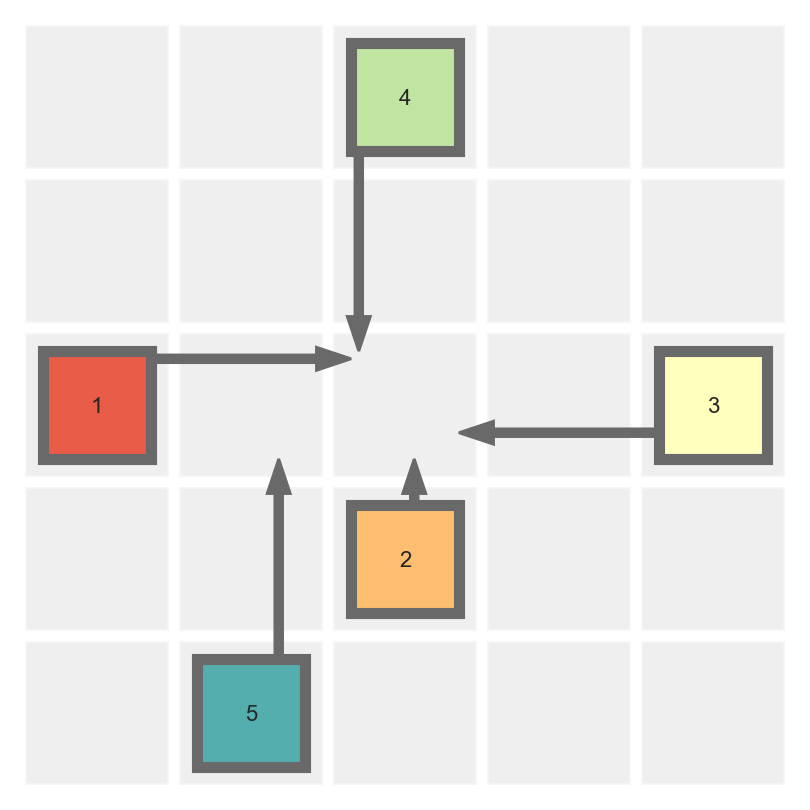

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Throuple6
------------------------------------------------------------------------------------------------------------


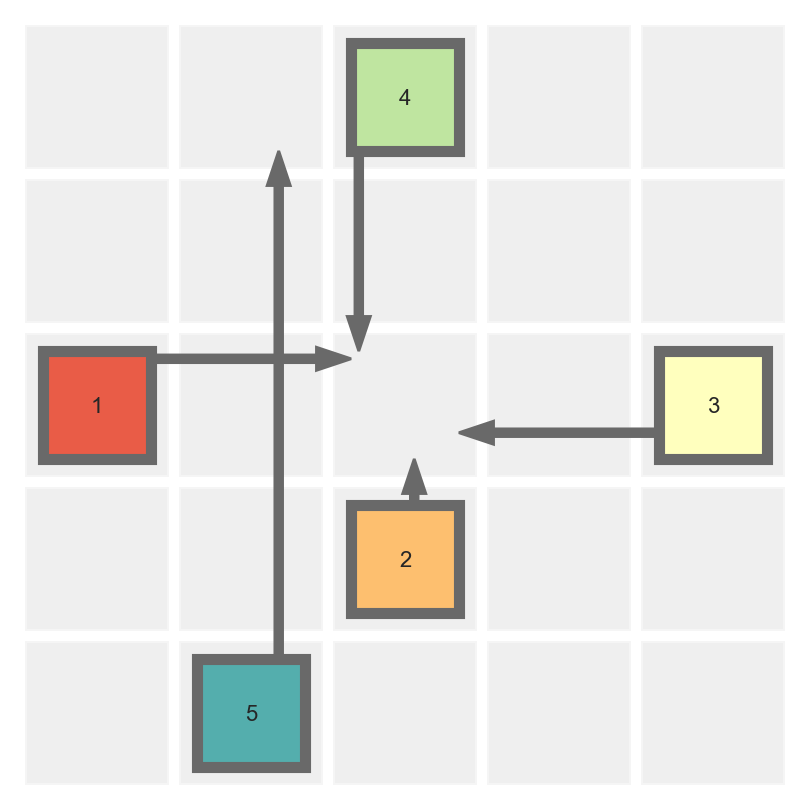

------------------------------------------------------------------------------------------------------------






In [3]:
Scenario_source_file = 'Scenarios4FeARSims.json'


with open(Scenario_source_file) as f:
    data = json.load(f)
    
scenarios_ = data.keys()

for scenario_ in scenarios_:
    print('------------------------------------------------------------------------------------------------------------')
    print(f'{scenario_}')
    print('------------------------------------------------------------------------------------------------------------')
    
    Scenario = GWorld.LoadJsonScenario(json_filename=Scenario_source_file,scenario_name=scenario_)
    
    # GWorld Preview

    Region = np.array(Scenario['Map']['Region'])
    Walls = Scenario['Map']['Walls']
    OneWays = Scenario['Map']['OneWays']

    World = GWorld.GWorld(Region, Walls= Walls, OneWays = OneWays) # Initialising GWorld from Scenario

    N_Agents = Scenario['N_Agents']
    AgentLocations = Scenario['AgentLocations'].copy()


    AgentLocations = []
    for location in Scenario['AgentLocations']:
        AgentLocations.append(tuple(location))

    # Adding N Agents at sortedandom positions
    if len(AgentLocations) < N_Agents:
        [locX,locY] = np.where(Region==1)

        LocIdxs = rng.choice(locX.shape[0], size=(N_Agents-len(AgentLocations)), replace=False, shuffle=False)
        LocIdxs.sort()

        for Idx in LocIdxs:
            AgentLocations.append((locX[Idx],locY[Idx]))

    # Adding Agents
    PreviousAgentAdded = True
    for location in AgentLocations:
        # Adding new Agents if Previous Agent was Added to the World
        if PreviousAgentAdded: 
            Ag_i = Agent.Agent()
        PreviousAgentAdded = World.AddAgent(Ag_i,location, printStatus=False)

    PreviousAgentAdded = True
    while len(World.AgentList) < N_Agents:
        # Adding new Agents if Previous Agent was Added to the World
        if PreviousAgentAdded: 
            Ag_i = Agent.Agent()
        Loc_i = (np.random.randint(Region.shape[0]),np.random.randint(Region.shape[1]))
        PreviousAgentAdded = World.AddAgent(Ag_i,Loc_i, printStatus=False)

    # -------------------------------------------------------------------------------
    # Selecting actions for agents
    # -------------------------------------------------------------------------------
    
    defaultAction = Scenario['defaultAction']
    SpecificAction4Agents = Scenario['SpecificAction4Agents']
    
    # Setting Policy for all Agents
    
    # The default Step and Direction Weights
    StepWeights=Scenario['StepWeights']
    DirectionWeights=Scenario['DirectionWeights']
    
    ListOfStepWeights = []
    ListOfDirectionWeights = []
    
    for ii in range(len(World.AgentList)):
        ListOfStepWeights.append(StepWeights)
        ListOfDirectionWeights.append(DirectionWeights)
    
    
    # Updating the list of stepweights based on specific weights for agents    
    for agentIDs,stepweights4agents in Scenario['SpecificStepWeights4Agents']:
        for agentID in agentIDs:
            ListOfStepWeights[agentID] = stepweights4agents
    
    # Updating the list of directionweights based on specific weights for agents            
    for agentIDs,directionweights4agents in Scenario['SpecificDirectionWeights4Agents']:
        for agentID in agentIDs:
            ListOfDirectionWeights[agentID] = directionweights4agents
    
    # Updating Agent Policies in World   
        for ii,agent in enumerate(World.AgentList):
            policy = Agent.GeneratePolicy(StepWeights=ListOfStepWeights[ii],DirectionWeights=ListOfDirectionWeights[ii])
            agent.UpdateActionPolicy(policy)

    if 'Policies' in (Scenario.keys()):
        # Dictionary of Policies
        if Scenario['Policies']:
            policies = Scenario['Policies']
            policy_map = np.zeros(np.shape(Region), dtype=int)
            
            policy_keys = Scenario['Policies'].keys()
            # print(f'{policy_keys =}')
            for key in policy_keys:
                slicex = Scenario['Policies'][key]['slicex']
                slicey = Scenario['Policies'][key]['slicey']
                policy_map[slicex, slicey] = key
        
            # print(f'Region =\n {Region}')
            print(f'policyMap =\n {policy_map}')
        
            # Setting Policy for all Agents
        
            # Updating Agent Policies in World
            for ii, agent in enumerate(World.AgentList):
                agent_location = World.AgentLocations[ii]
                agent_policy = str(policy_map[agent_location[0], agent_location[1]]).zfill(2)
                if 'policyWeights' in policies[agent_policy].keys():
                    policy_weights = policies[agent_policy]['policyWeights']
                    agent_stepWeights = None
                    agent_directionWeights = None
                else:
                    policy_weights = None
                    agent_stepWeights = policies[agent_policy]['stepWeights']
                    agent_directionWeights = policies[agent_policy]['directionWeights']
        
                policy = Agent.GeneratePolicy(StepWeights=agent_stepWeights, DirectionWeights=agent_directionWeights, policy_weights=policy_weights)        
                agent.UpdateActionPolicy(policy)

            
    Action4Agents = World.SelectActionsForAll(defaultAction = defaultAction,InputActionID4Agents = SpecificAction4Agents)


    # Plotting the State of the World and Chosen Actions for the next iteration
    plotgw.ViewGWorld(World,ViewActionArrows=True, ViewNextStep = True, ViewActionTrail=False);
    
    print('------------------------------------------------------------------------------------------------------------\n\n\n\n')


### ID and name of actions

In [4]:
ActionNames, _ = Agent.DefineActions()

for iis in [[0], [1,2,3,4], [5,6,7,8], [9,10,11,12,], [13,14,15,16]]:
        print([f'{ii:2d}:{ActionNames[ii]}' for ii in iis])

print('--------------------------------------------------------')

[' 0:Stay']
[' 1:Up1', ' 2:Down1', ' 3:Left1', ' 4:Right1']
[' 5:Up2', ' 6:Down2', ' 7:Left2', ' 8:Right2']
[' 9:Up3', '10:Down3', '11:Left3', '12:Right3']
['13:Up4', '14:Down4', '15:Left4', '16:Right4']
--------------------------------------------------------


# View Template Scenario

In [11]:
Scenario = GWorld.LoadJsonScenario(json_filename=Scenario_source_file,scenario_name=Template_Scenario)

# View  Template Scenario
pretty_print_json = pprint.pformat(Scenario,width=150).replace("'", '"')
print(pretty_print_json)

{"AgentLocations": [[4, 0], [6, 0], [5, 1], [7, 1], [4, 2], [6, 2], [5, 3], [7, 3]],
 "DirectionWeights": [1, 1, 1, 1],
 "Map": {"OneWays": [],
         "Region": [[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 

---


# Generate New Map
The following commands can be useful in defining a NewMap for the scenario

- The Map of the GWorld Scenario is represented by a Matrix of ones and zeros. 
- **Ones** represent **valid locations** the agents in the simulation can occupy.
- **Zeros** represent **invalid locations which cannot be occupied by agents.

In [12]:
# Some helpful templates for tweaking maps. 

# NewMap = np.zeros([12,12])
# NewMap = np.zeros([4,10])
NewMap = np.ones([4,4])

# # NewMap[:,2] = 1
# # NewMap[2,:] = 1

# marginx = 4
# marginy = 1

# NewMap[:,marginx+1] = 1
# NewMap[:,-(marginx+2)] = 1

# NewMap[marginy+1,marginx+1:-(marginx+2)] = 1
# NewMap[-(marginy+2),marginx+1:-(marginx+2)] = 1

print(NewMap)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


# Make changes to the values of the Template

- `Overwrite = False` ensures that already existing scenarios are not overwritten.

---

- Use **DirectionWeights** and **StepWeights** to select the relative preference for action selection. These together define the action selection policy of an agent.
- **DirectionWeights** and **StepWeights** are the default values for all agents.
- To specify different values for specific agents use **SpecificDirectionWeights4Agents** and **SpecificStepWeights4Agents**
- **Policies** can be used to specifiy **DirectionWeights** and **StepWeights** based on the location of the agent.
- Check **PolicyMap** (when reviewing the scenario) to see which policy is active at each location. 
---

- **OneWays** allow for movement in one direction only (from start to stop).
- Actions that cause movements from the stop to start of a OneWay results is invalid and trigger collisions
- Define OneWays as list of tuples of adjacent locations [ [[x_start,y_start], [x_stop,y_stop]], [[x_start,y_start], [x_stop,y_stop]], ... ]

---

- **Walls** are also defined between adjacent cells. But movement is blocked in both directions.
- Define Walls as list of tuples of adjacent locations [ [[x_start,y_start], [x_stop,y_stop]], [[x_start,y_start], [x_stop,y_stop]], ... ]

---

In [13]:
# Some helpful templates for making changes to scenarios.

# Scenario['Map']['OneWays'] = [ [[2,5],[2,6]], [[7,10],[7,9]], [[2,10],[3,10]], [[7,5],[6,5]]  ]
# Scenario['Map']['Walls'] = [ [[1,5],[2,5]], [[7,10],[8,10]] ]
# Scenario['Map']['Region'] = NewMap.tolist()

# Scenario['Map']['OneWays'] = []
# Scenario['Map']['Walls'] = []
# Scenario['N_Agents'] = 8
# Scenario['N_Cases'] = 50
# Scenario['N_iterations'] = 5
# Scenario['AgentLocations'] = []


# Scenario['AgentLocations'] = [
#     [1, 0],
#     [1, 2],
#     [2, 2],
#     [2, 3],
#     [0, 5],
#     [2, 5],
#     [1, 7],
#     [1, 9]]

# Scenario['SpecificAction4Agents'] = [
#     [[0],[1]],
#     [[1],[8]],
#     [[2],[3]],
# ]

## DirectionWeights Order = [Up, Down, left, Right]
Scenario['DirectionWeights'] = [1, 1, 1, 1]
Scenario['StepWeights'] = [1, 1, 1, 1, 1]

# Scenario['SpecificStepWeights4Agents'] = []
# Scenario['SpecificDirectionWeights4Agents'] = []

# Scenario['SpecificStepWeights4Agents'] = [[[1], [0, 0, 0, 1, 0]],
#                                           [[6], [0, 1, 0, 0, 0]]
#                                          ] 

# Scenario['SpecificDirectionWeights4Agents'] = [[[2], [0, 0, 1, 0]],
#                                                [[3], [0, 1, 0, 0]],
#                                                ]

Scenario['Policies'] = []


# Review New Scenario

In [14]:
# Pretty Formating

pretty_print_json = pprint.pformat(Scenario,width=150).replace("'", '"')
print(pretty_print_json)

{"AgentLocations": [[4, 0], [6, 0], [5, 1], [7, 1], [4, 2], [6, 2], [5, 3], [7, 3]],
 "DirectionWeights": [1, 1, 1, 1],
 "Map": {"OneWays": [],
         "Region": [[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 

# Preview New Scenario

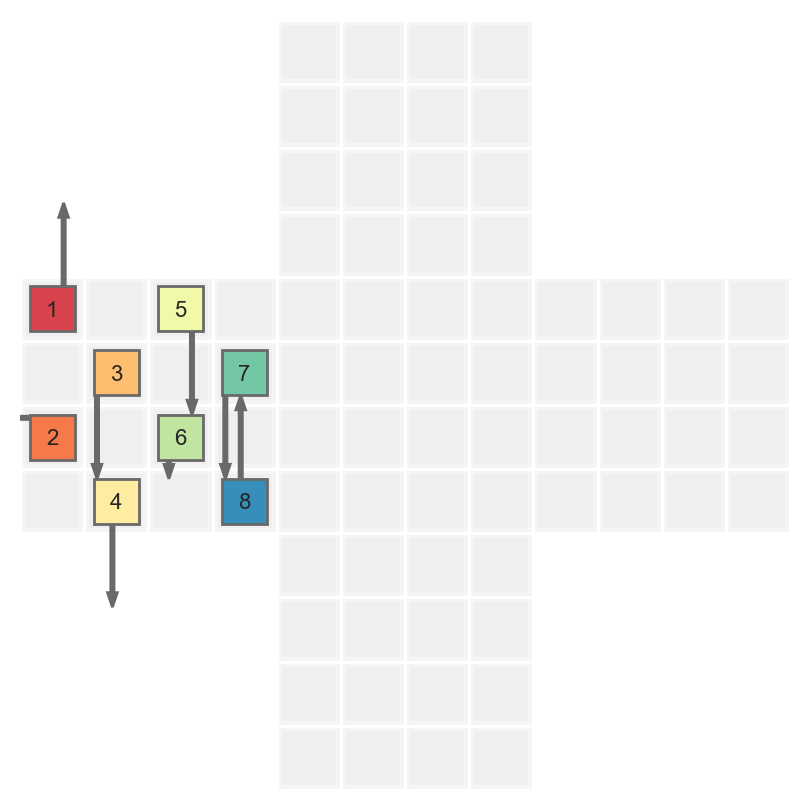

In [15]:
# GWorld Preview

Region = np.array(Scenario['Map']['Region'])
Walls = Scenario['Map']['Walls']
OneWays = Scenario['Map']['OneWays']

World = GWorld.GWorld(Region, Walls= Walls, OneWays = OneWays) # Initialising GWorld from Scenario

N_Agents = Scenario['N_Agents']
AgentLocations = Scenario['AgentLocations'].copy()
    
    
AgentLocations = []
for location in Scenario['AgentLocations']:
    AgentLocations.append(tuple(location))

# Adding N Agents at sorted random positions
if len(AgentLocations) < N_Agents:
    [locX,locY] = np.where(Region==1)

    LocIdxs = rng.choice(locX.shape[0], size=(N_Agents-len(AgentLocations)), replace=False, shuffle=False)
    LocIdxs.sort()

    for Idx in LocIdxs:
        AgentLocations.append((locX[Idx],locY[Idx]))

# Adding Agents
PreviousAgentAdded = True
for location in AgentLocations:
    # Adding new Agents if Previous Agent was Added to the World
    if PreviousAgentAdded: 
        Ag_i = Agent.Agent()
    PreviousAgentAdded = World.AddAgent(Ag_i,location, printStatus=False)

PreviousAgentAdded = True
while len(World.AgentList) < N_Agents:
    # Adding new Agents if Previous Agent was Added to the World
    if PreviousAgentAdded: 
        Ag_i = Agent.Agent()
    Loc_i = (np.random.randint(Region.shape[0]),np.random.randint(Region.shape[1]))
    PreviousAgentAdded = World.AddAgent(Ag_i,Loc_i, printStatus=False)

# -------------------------------------------------------------------------------
# Selecting actions for agents
# -------------------------------------------------------------------------------

defaultAction = Scenario['defaultAction']
SpecificAction4Agents = Scenario['SpecificAction4Agents']

# Setting Policy for all Agents

# The default Step and Direction Weights
StepWeights=Scenario['StepWeights']
DirectionWeights=Scenario['DirectionWeights']

ListOfStepWeights = []
ListOfDirectionWeights = []

for ii in range(len(World.AgentList)):
    ListOfStepWeights.append(StepWeights)
    ListOfDirectionWeights.append(DirectionWeights)


# Updating the list of stepweights based on specific weights for agents    
for agentIDs,stepweights4agents in Scenario['SpecificStepWeights4Agents']:
    for agentID in agentIDs:
        ListOfStepWeights[agentID] = stepweights4agents

# Updating the list of directionweights based on specific weights for agents            
for agentIDs,directionweights4agents in Scenario['SpecificDirectionWeights4Agents']:
    for agentID in agentIDs:
        ListOfDirectionWeights[agentID] = directionweights4agents

# Updating Agent Policies in World   
    for ii,agent in enumerate(World.AgentList):
        policy = Agent.GeneratePolicy(StepWeights=ListOfStepWeights[ii],DirectionWeights=ListOfDirectionWeights[ii])
        agent.UpdateActionPolicy(policy)

if 'Policies' in (Scenario.keys()):
    # Dictionary of Policies
    if Scenario['Policies']:
        policies = Scenario['Policies']
        policy_map = np.zeros(np.shape(Region), dtype=int)
        
        policy_keys = Scenario['Policies'].keys()
        # print(f'{policy_keys =}')
        for key in policy_keys:
            slicex = Scenario['Policies'][key]['slicex']
            slicey = Scenario['Policies'][key]['slicey']
            policy_map[slicex, slicey] = key
    
        print(f'Region =\n {Region}')
        print(f'policyMap =\n {policy_map}')

        # Setting Policy for all Agents
    
        # Updating Agent Policies in World
        for ii, agent in enumerate(World.AgentList):
            agent_location = World.AgentLocations[ii]
            agent_policy = str(policy_map[agent_location[0], agent_location[1]]).zfill(2)
            if 'policyWeights' in policies[agent_policy].keys():
                policy_weights = policies[agent_policy]['policyWeights']
                agent_stepWeights = None
                agent_directionWeights = None
            else:
                policy_weights = None
                agent_stepWeights = policies[agent_policy]['stepWeights']
                agent_directionWeights = policies[agent_policy]['directionWeights']
    
            policy = Agent.GeneratePolicy(StepWeights=agent_stepWeights, DirectionWeights=agent_directionWeights, policy_weights=policy_weights)
            agent.UpdateActionPolicy(policy)
        
   


Action4Agents = World.SelectActionsForAll(defaultAction = defaultAction,InputActionID4Agents = SpecificAction4Agents)

# Plotting the State of the World and Chosen Actions for the next iteration
plotgw.ViewGWorld(World, ViewNextStep = True ,ViewActionTrail=False);

In [16]:
# Add Scenario to JSON file

GWorld.AddJsonScenario(json_filename=Scenario_destination_file,new_scenario=Scenario, new_scenario_name=new_scenario_name, Overwrite = Overwrite)
print(f'{new_scenario_name=}')

Error - Scenario Exists - Overwrite is False !
new_scenario_name='Intersection12by12-8Agents-5Cases-3Iterations-policy-random'
